In [1]:
library(CellChat)
library(ggplot2)
library(ggalluvial)
library(svglite)
library(Seurat)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Attaching SeuratObject



In [2]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.4.3
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [3]:
load(file="0711-ob.integratve-7samples.Rda")

In [4]:
AL<-subset(ob.integrated,orig.ident=='pALPC1')

In [5]:
AL

An object of class Seurat 
22868 features across 3675 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
data.input  <- AL@assays$RNA@data
identity = data.frame(group =AL@meta.data$seurat_clusters   , row.names = row.names(AL@meta.data)) # create a dataframe consisting of the cell labels
unique(identity$group) # check the cell labels

[1] 0 2 1 4 6 5 3
Levels: 0 1 2 3 4 5 6

In [7]:
identity$group<-paste('cluster',identity$group,sep='')

In [8]:
cellchat <- createCellChat(data.input)
cellchat

Create a CellChat object from a data matrix



An object of class CellChat created from a single dataset 
 20868 genes.
 3675 cells.

In [9]:
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity

In [10]:
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

In [11]:
CellChatDB <- CellChatDB.human 

In [12]:
colnames(CellChatDB$interaction)

[1] "interaction_name"   "pathway_name"       "ligand"            
 [4] "receptor"           "agonist"            "antagonist"        
 [7] "co_A_receptor"      "co_I_receptor"      "evidence"          
[10] "annotation"         "interaction_name_2"

In [13]:
cellchat@DB <- CellChatDB

In [14]:
cellchat <- subsetData(cellchat)

In [15]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [16]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [17]:
cellchat <- projectData(cellchat, PPI.human) 

In [18]:
cellchat <- computeCommunProb(cellchat)

In [19]:
cellchat <- computeCommunProbPathway(cellchat)

In [20]:
cellchat <- aggregateNet(cellchat)

In [21]:
cellchat@netP$pathways

[1] "MIF"    "MK"     "PECAM1"

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

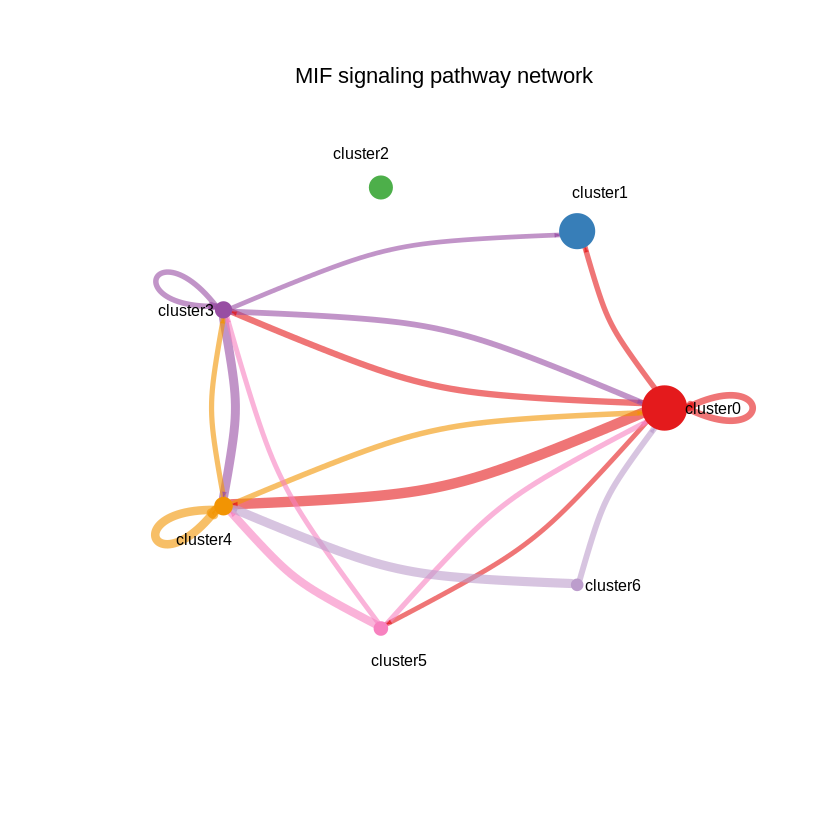

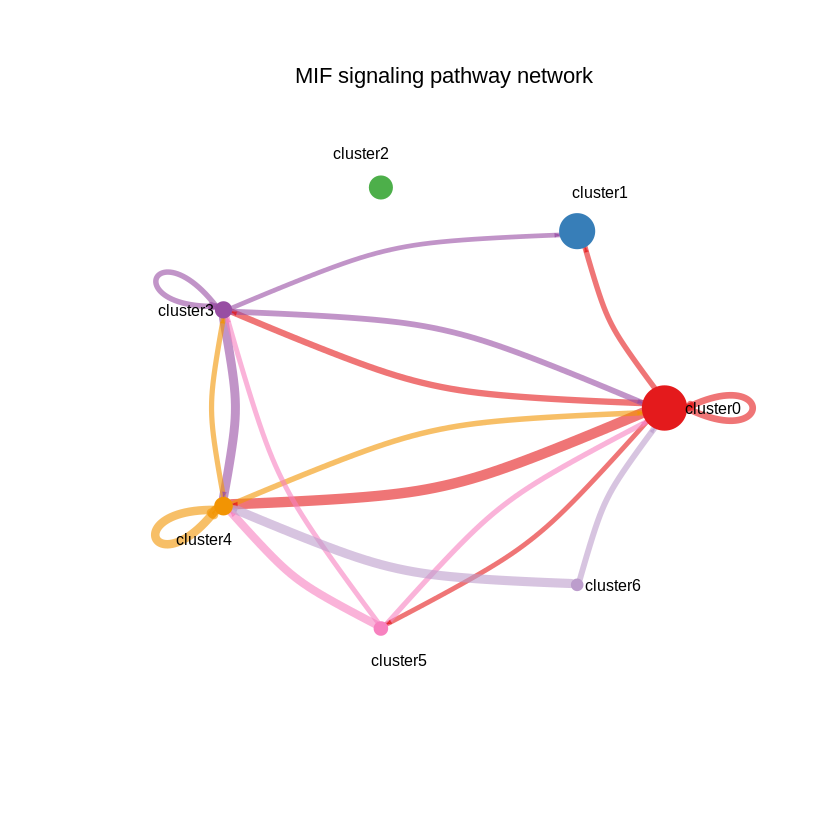

In [22]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MIF" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

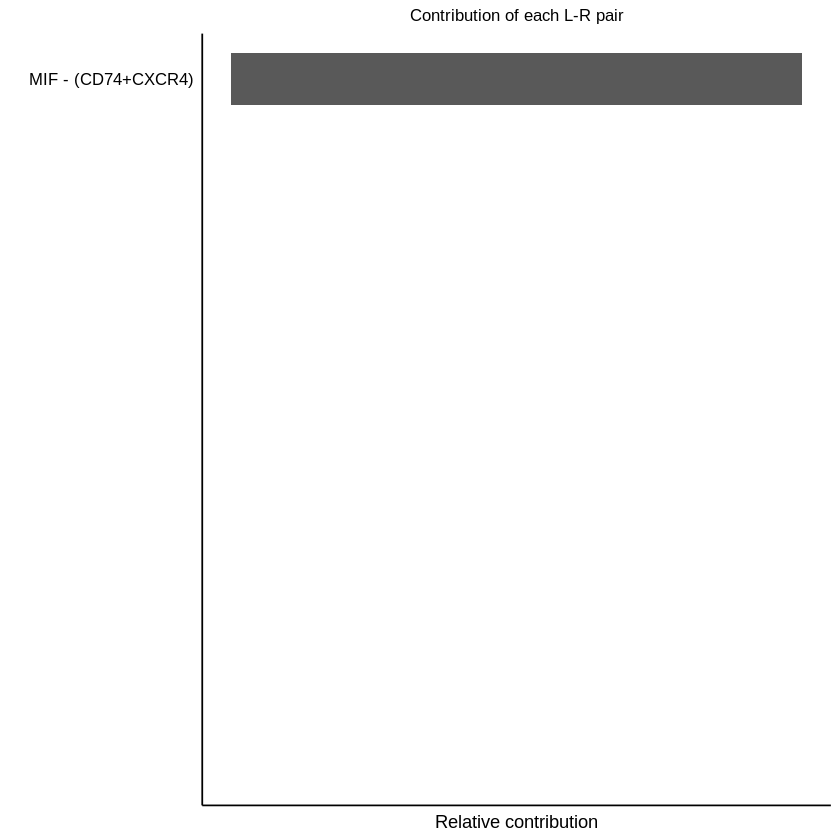

In [23]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

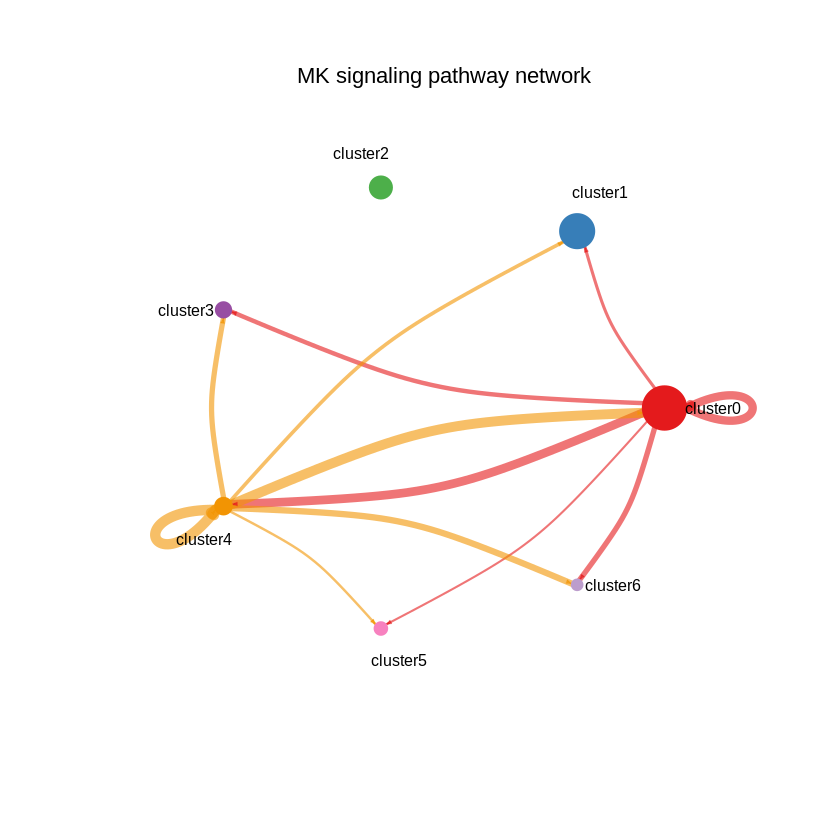

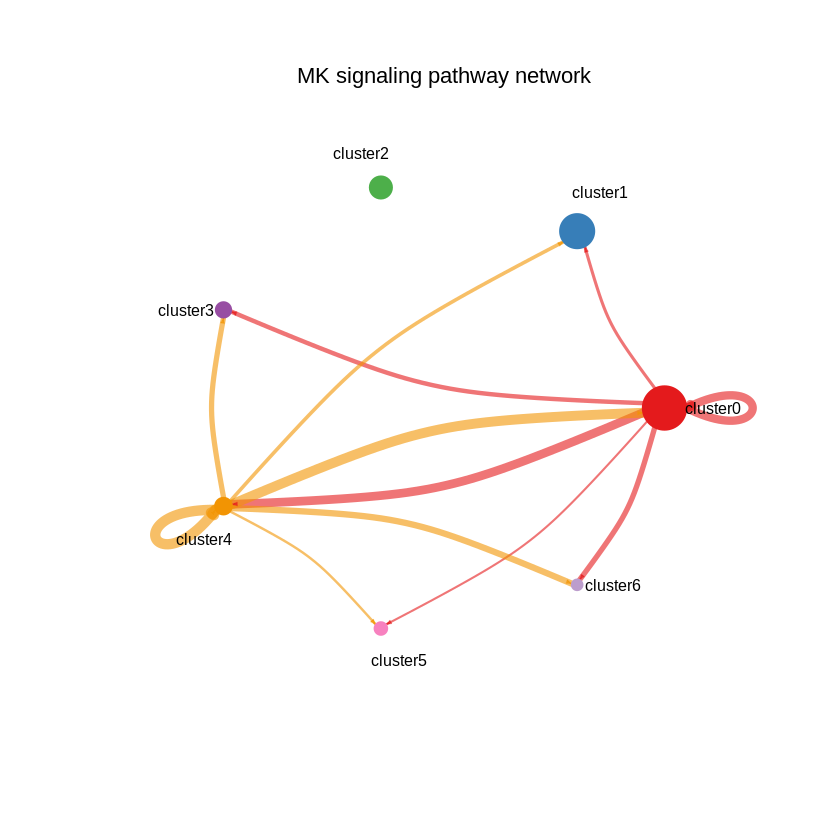

In [24]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MK" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

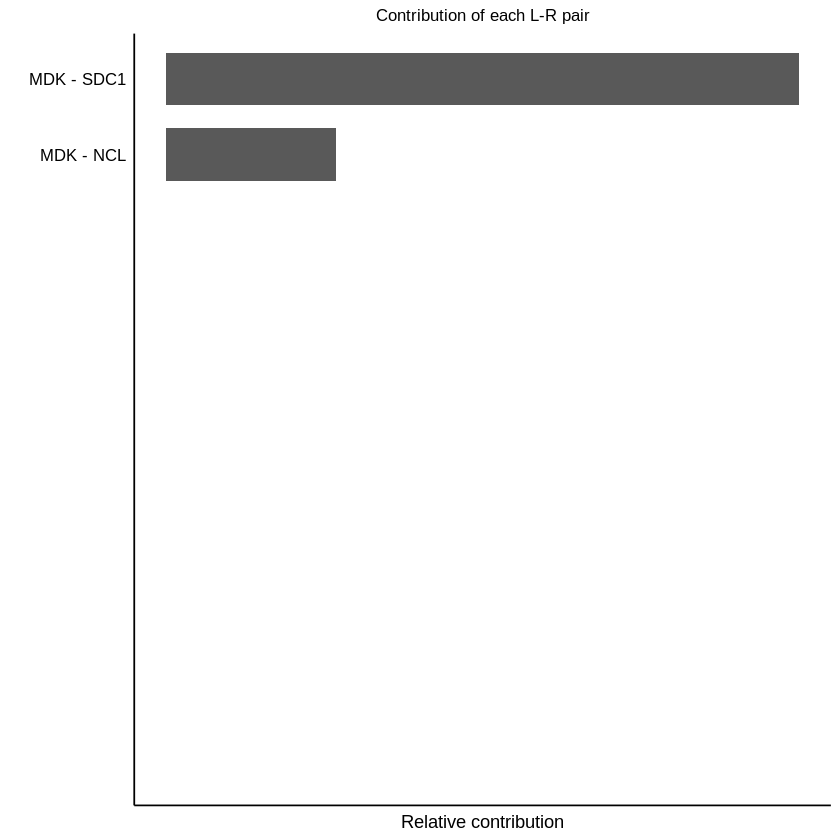

In [25]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

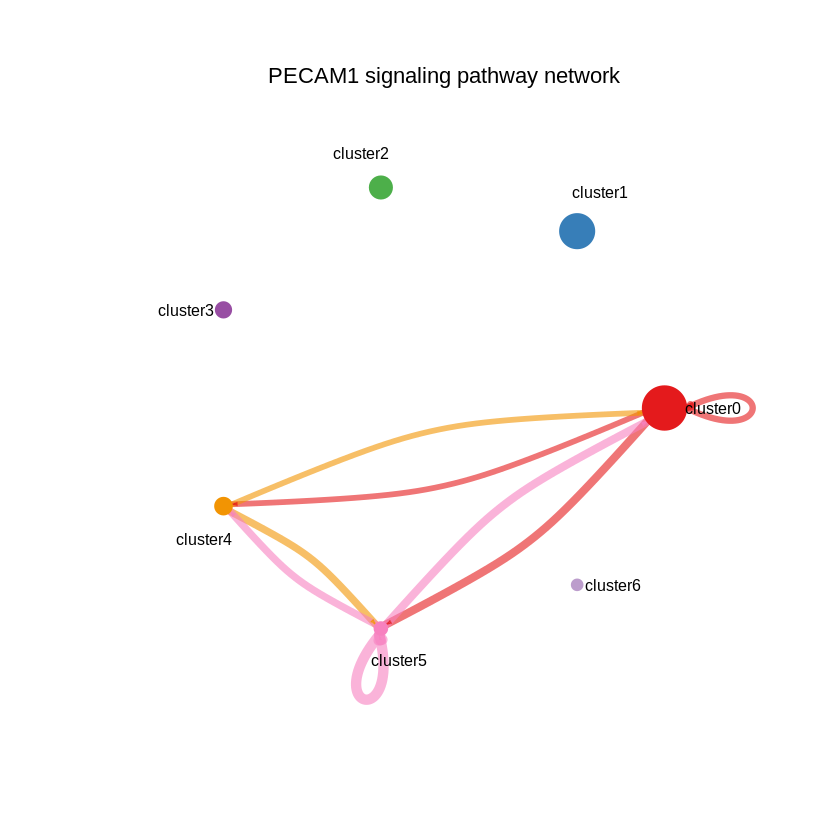

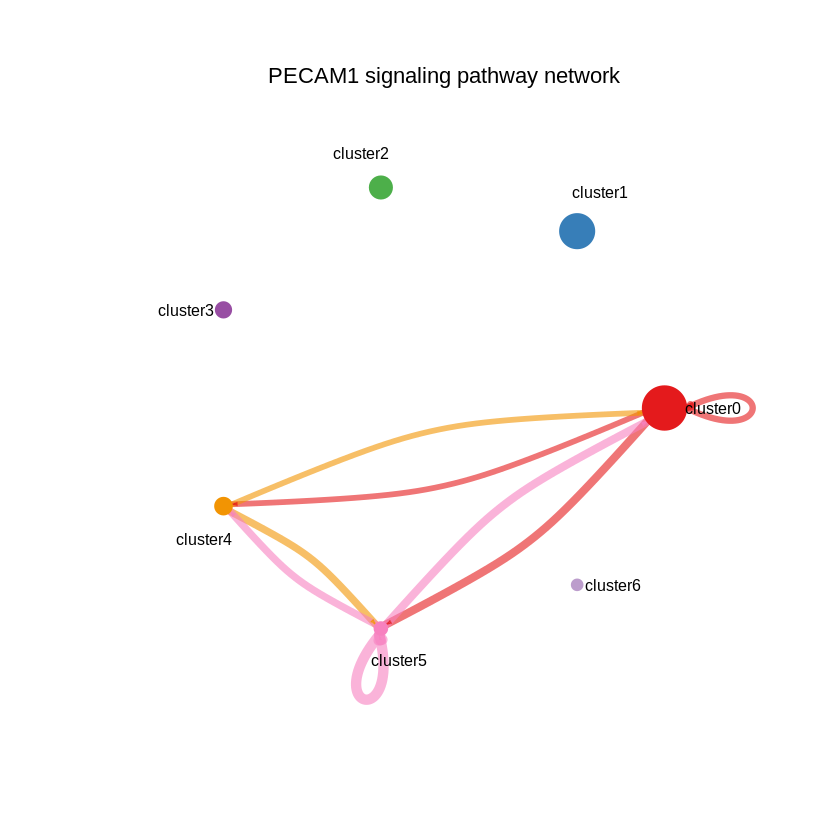

In [26]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "PECAM1" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

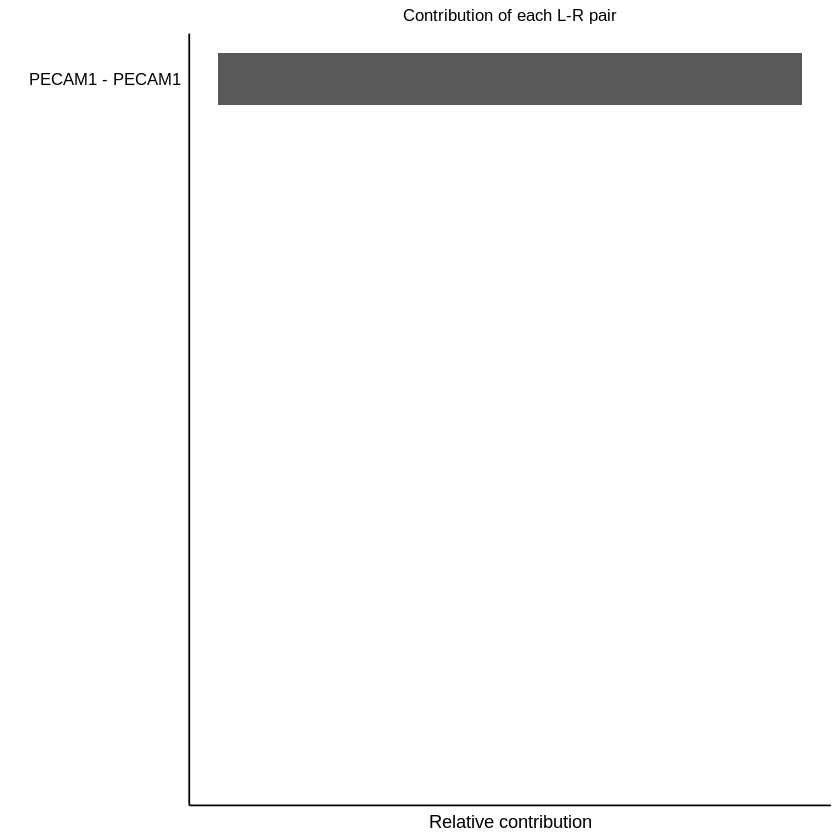

In [27]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

In [33]:
AL<-subset(ob.integrated,orig.ident=='pALPC2')

In [34]:
AL

An object of class Seurat 
22868 features across 1806 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [35]:
data.input  <- AL@assays$RNA@data
identity = data.frame(group =AL@meta.data$seurat_clusters   , row.names = row.names(AL@meta.data)) # create a dataframe consisting of the cell labels
unique(identity$group) # check the cell labels

[1] 5 2 0 4 1 3 6
Levels: 0 1 2 3 4 5 6

In [36]:
identity$group<-paste('cluster',identity$group,sep='')

In [37]:
cellchat <- createCellChat(data.input)
cellchat

Create a CellChat object from a data matrix



An object of class CellChat created from a single dataset 
 20868 genes.
 1806 cells.

In [38]:
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity

In [39]:
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

In [40]:
CellChatDB <- CellChatDB.human 

In [41]:
colnames(CellChatDB$interaction)

[1] "interaction_name"   "pathway_name"       "ligand"            
 [4] "receptor"           "agonist"            "antagonist"        
 [7] "co_A_receptor"      "co_I_receptor"      "evidence"          
[10] "annotation"         "interaction_name_2"

In [42]:
cellchat@DB <- CellChatDB

In [43]:
cellchat <- subsetData(cellchat)

In [44]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [45]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [46]:
cellchat <- projectData(cellchat, PPI.human) 

In [47]:
cellchat <- computeCommunProb(cellchat)

In [48]:
cellchat <- computeCommunProbPathway(cellchat)

In [49]:
cellchat <- aggregateNet(cellchat)

In [50]:
cellchat@netP$pathways

[1] "MIF"      "MK"       "PECAM1"   "COLLAGEN" "CD99"     "VISFATIN" "MPZ"     
[8] "NCAM"

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

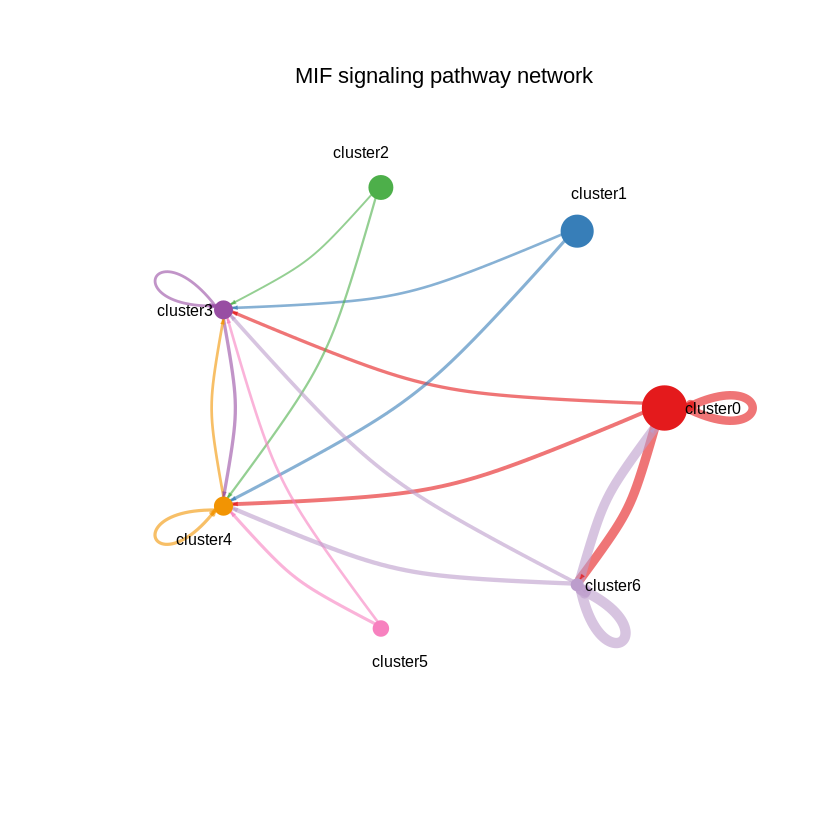

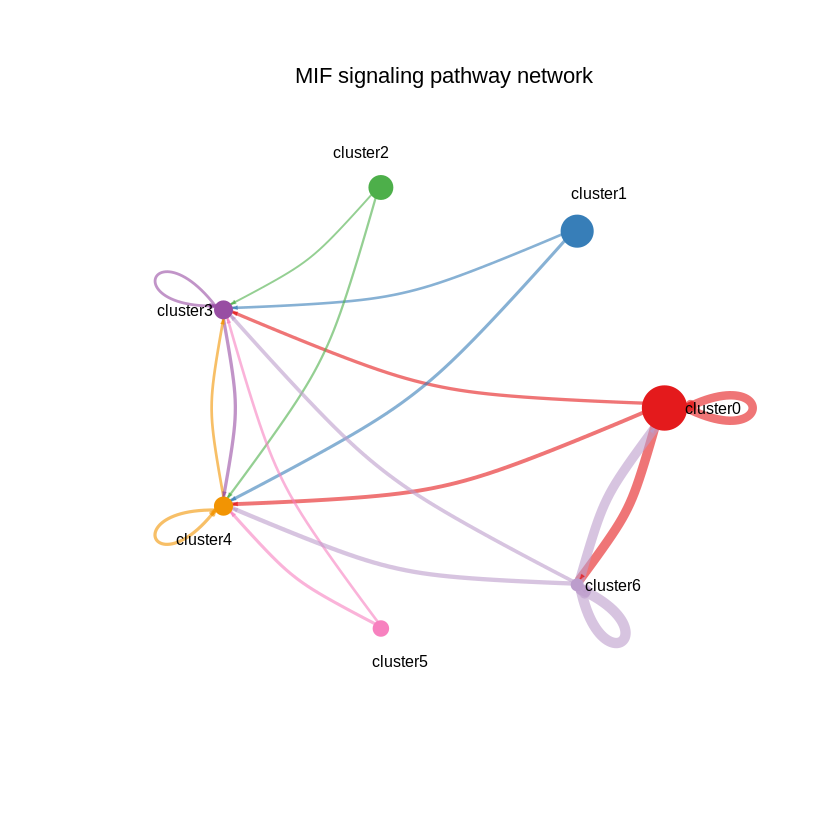

In [51]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MIF" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

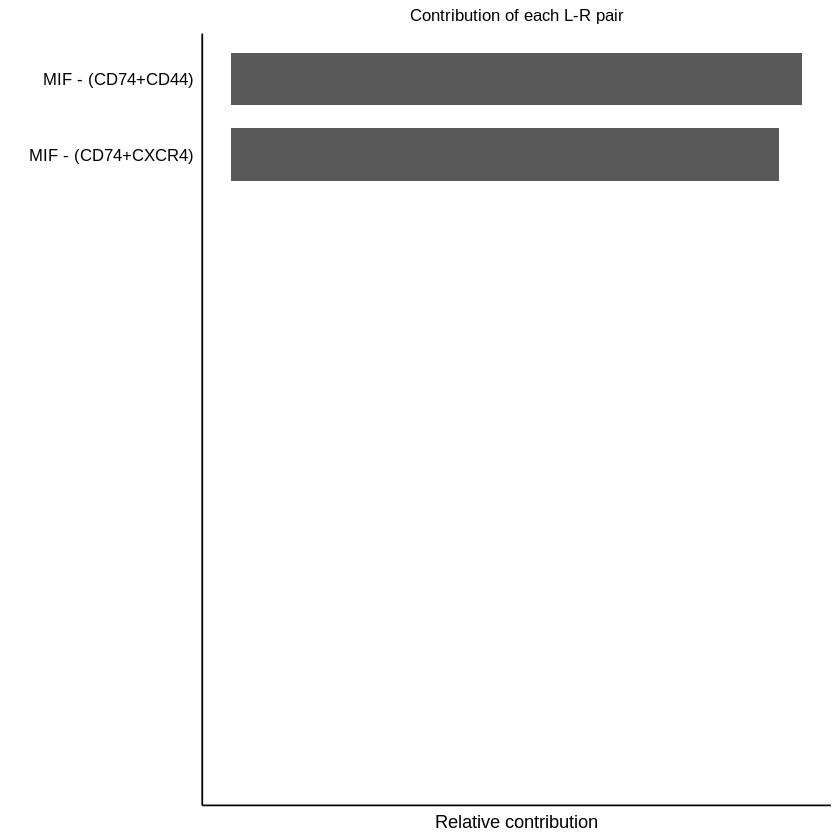

In [52]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

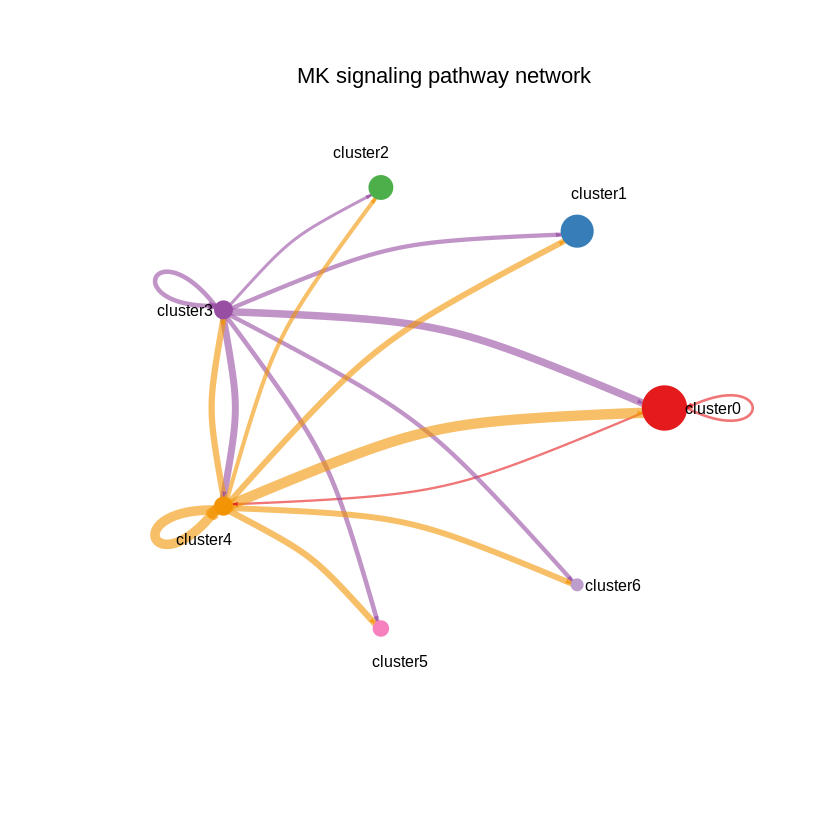

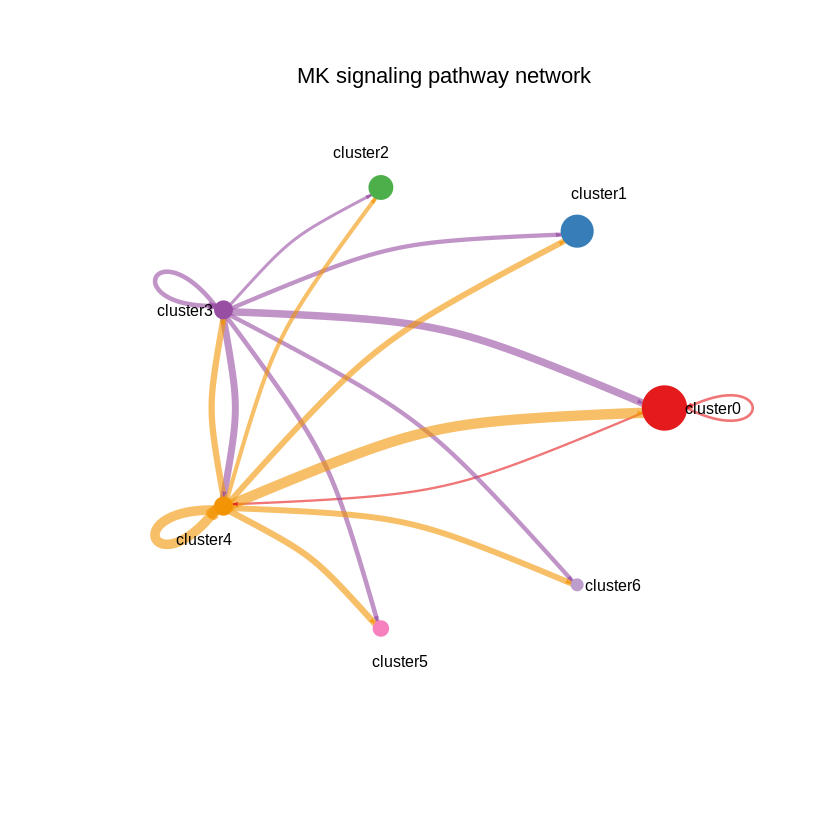

In [53]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MK" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

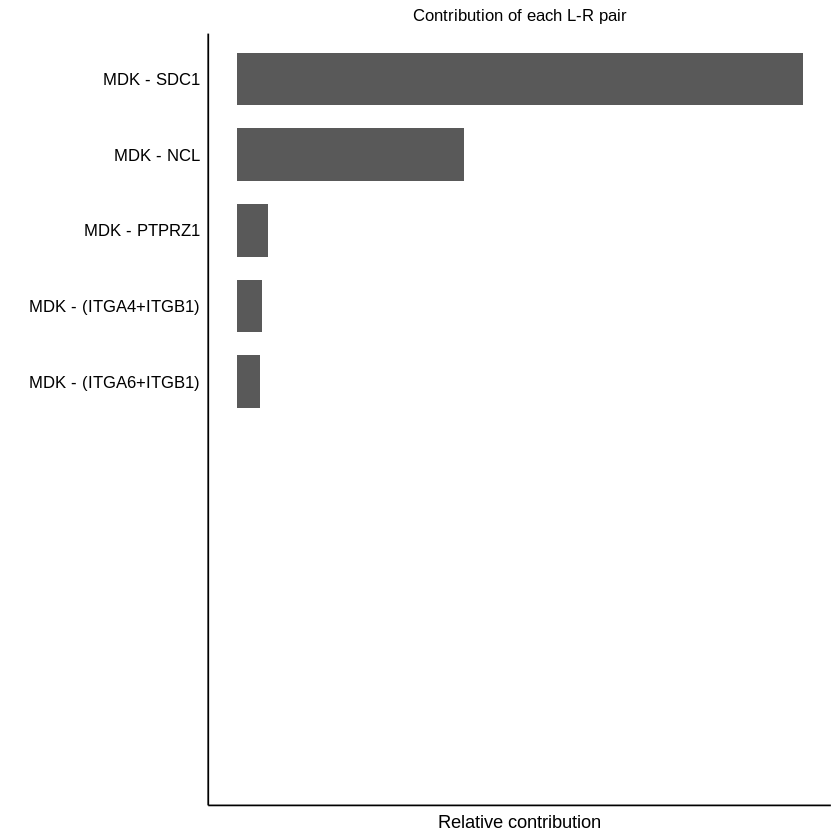

In [54]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

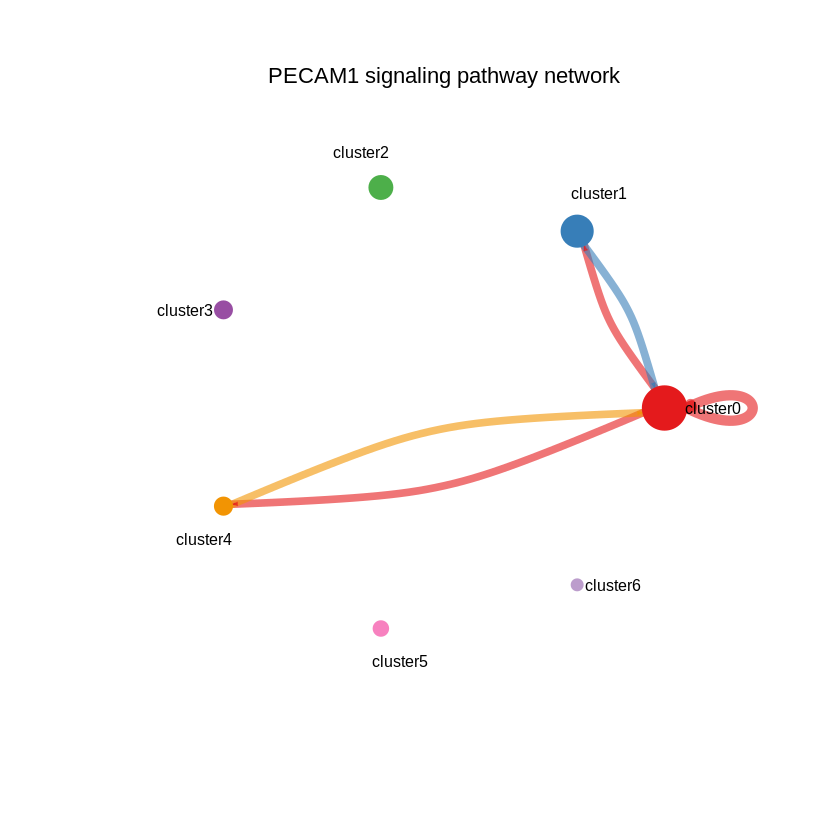

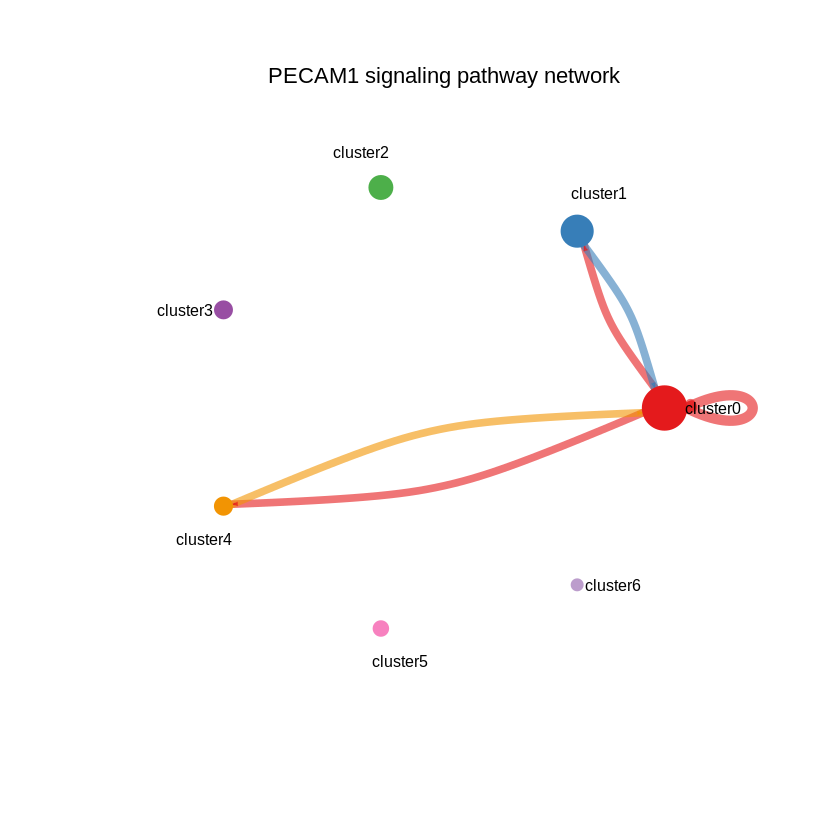

In [55]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "PECAM1" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

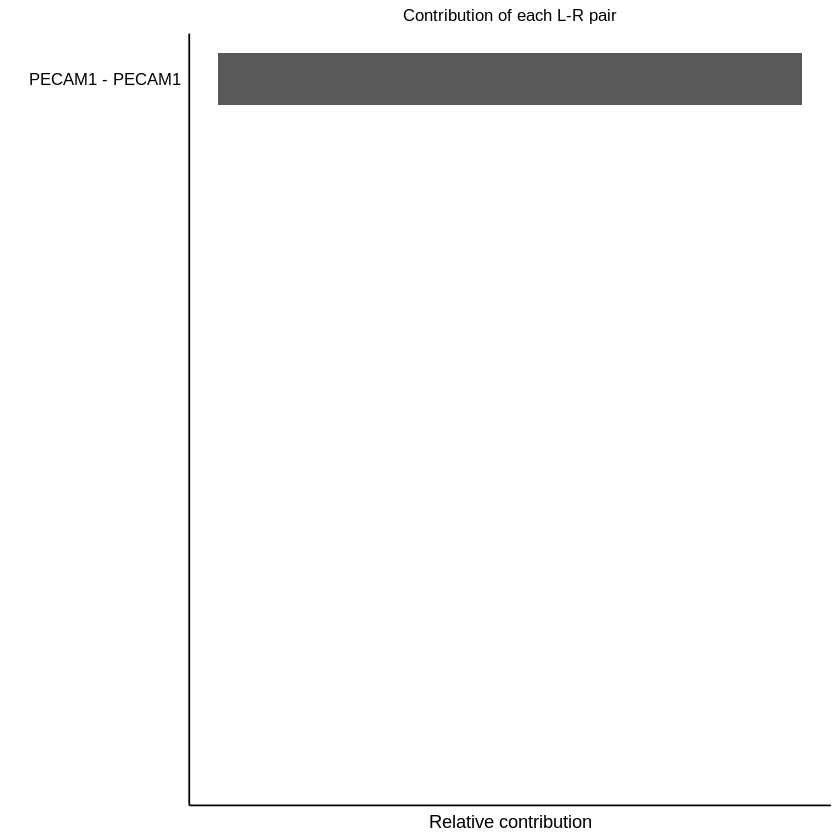

In [56]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

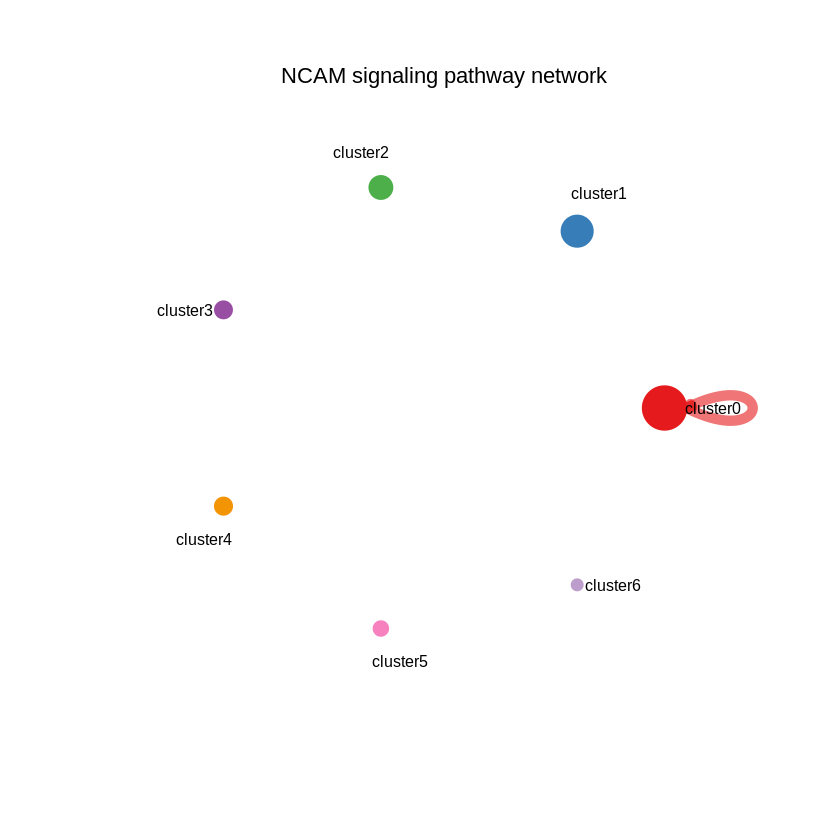

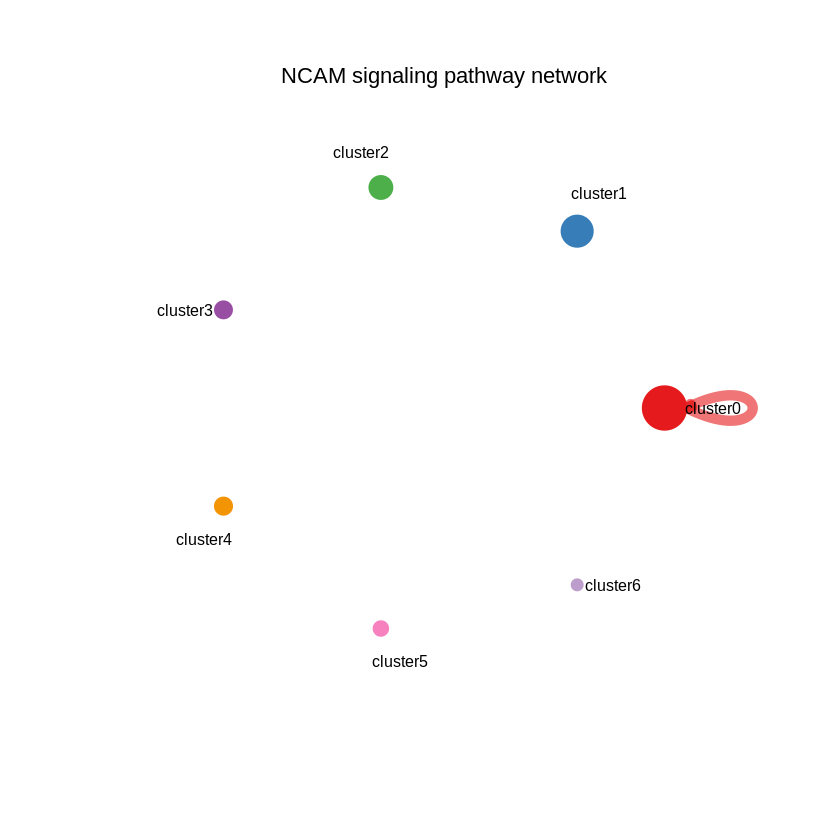

In [59]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "NCAM" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

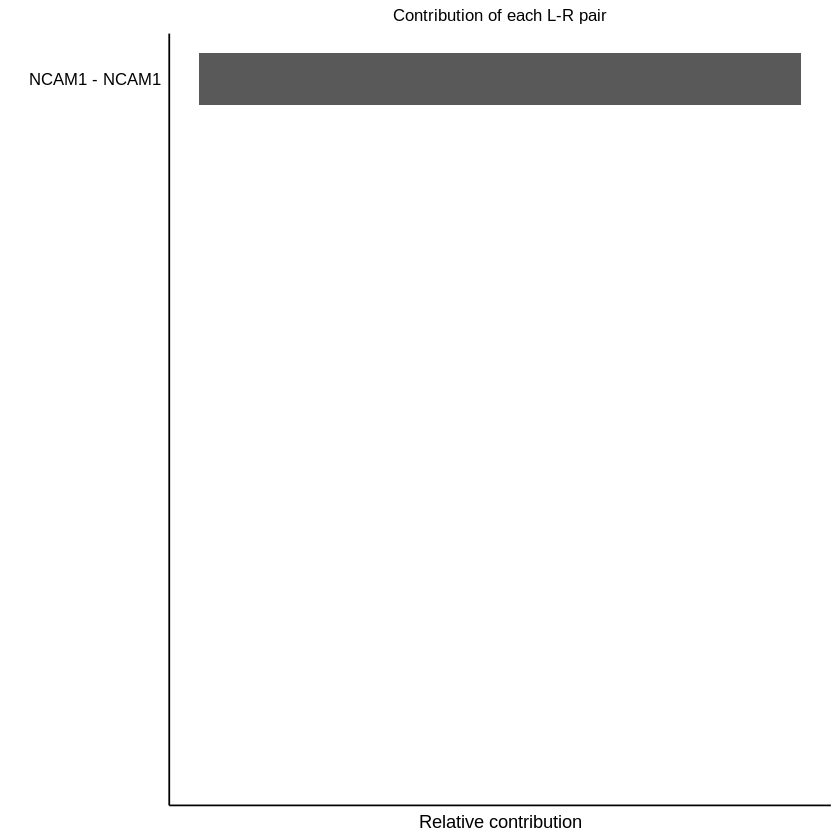

In [60]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

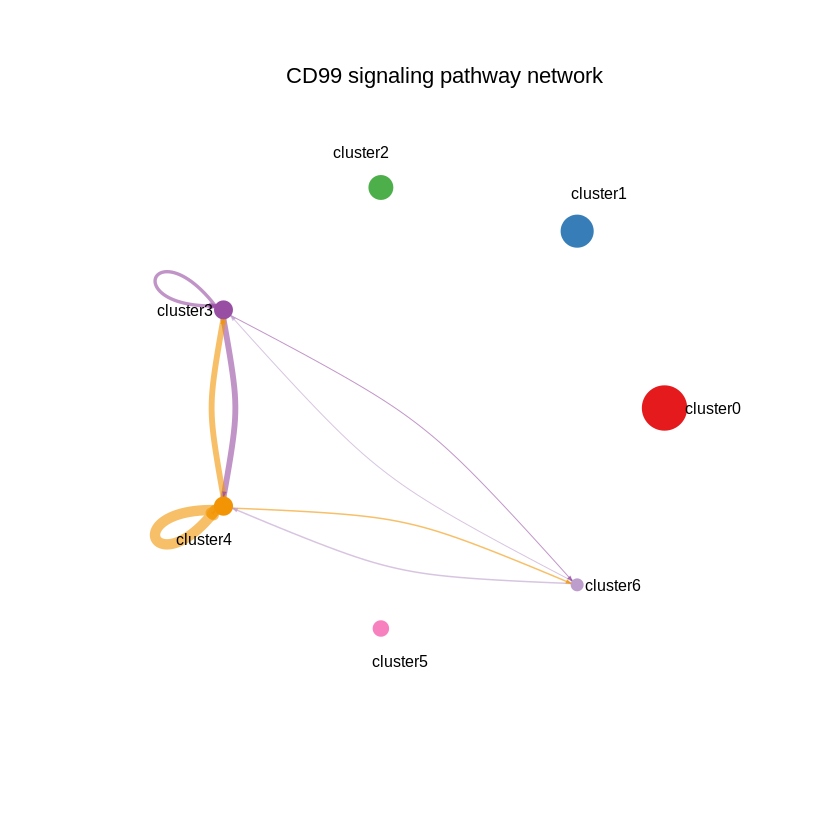

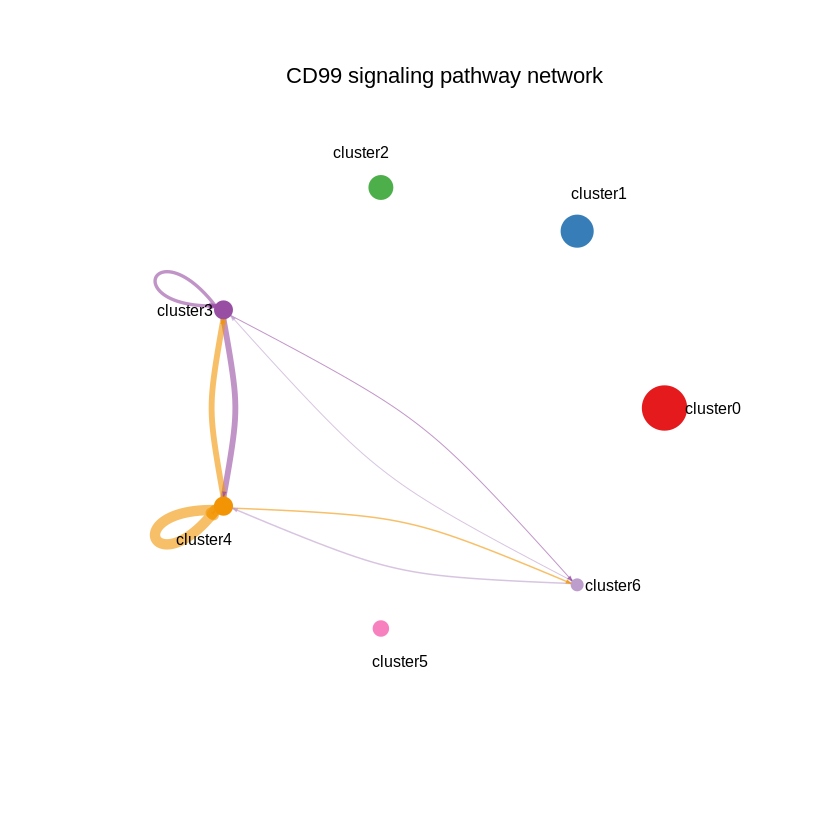

In [61]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "CD99" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

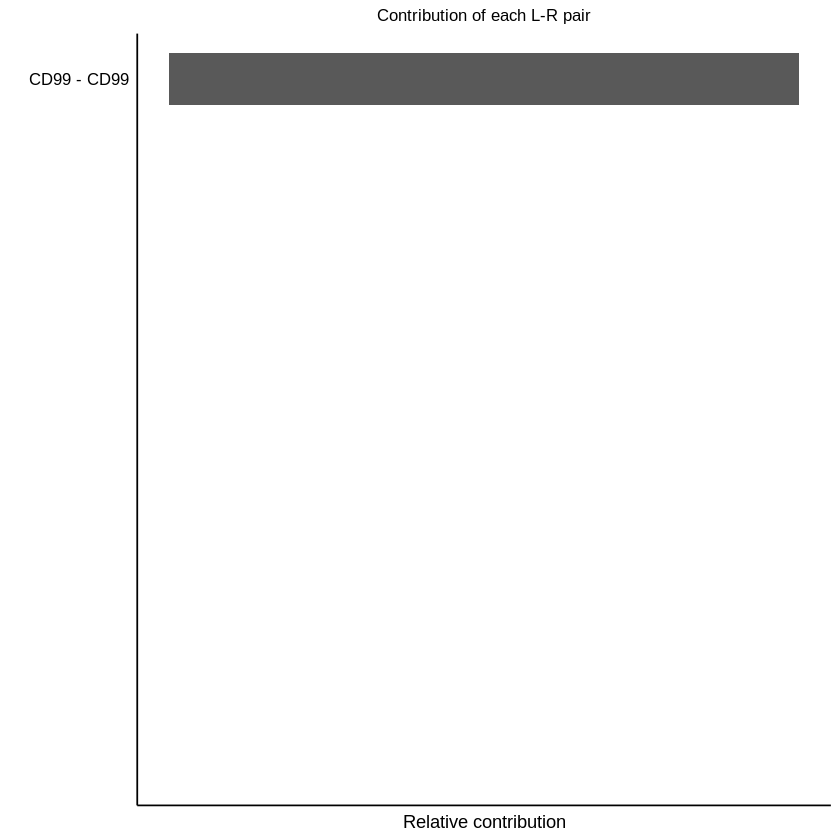

In [62]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

In [63]:
AL<-subset(ob.integrated,orig.ident=='pALPC3')

In [64]:
AL

An object of class Seurat 
22868 features across 4190 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [65]:
data.input  <- AL@assays$RNA@data
identity = data.frame(group =AL@meta.data$seurat_clusters   , row.names = row.names(AL@meta.data)) # create a dataframe consisting of the cell labels
unique(identity$group) # check the cell labels

[1] 2 0 3 4 1 5 6
Levels: 0 1 2 3 4 5 6

In [66]:
identity$group<-paste('cluster',identity$group,sep='')

In [67]:
cellchat <- createCellChat(data.input)
cellchat

Create a CellChat object from a data matrix



An object of class CellChat created from a single dataset 
 20868 genes.
 4190 cells.

In [68]:
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity

In [69]:
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

In [70]:
CellChatDB <- CellChatDB.human 

In [71]:
colnames(CellChatDB$interaction)

[1] "interaction_name"   "pathway_name"       "ligand"            
 [4] "receptor"           "agonist"            "antagonist"        
 [7] "co_A_receptor"      "co_I_receptor"      "evidence"          
[10] "annotation"         "interaction_name_2"

In [72]:
cellchat@DB <- CellChatDB

In [73]:
cellchat <- subsetData(cellchat)

In [74]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [75]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [76]:
cellchat <- projectData(cellchat, PPI.human) 

In [77]:
cellchat <- computeCommunProb(cellchat)

In [78]:
cellchat <- computeCommunProbPathway(cellchat)

In [79]:
cellchat <- aggregateNet(cellchat)

In [80]:
cellchat@netP$pathways

[1] "MIF"    "MK"     "CD99"   "PECAM1"

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

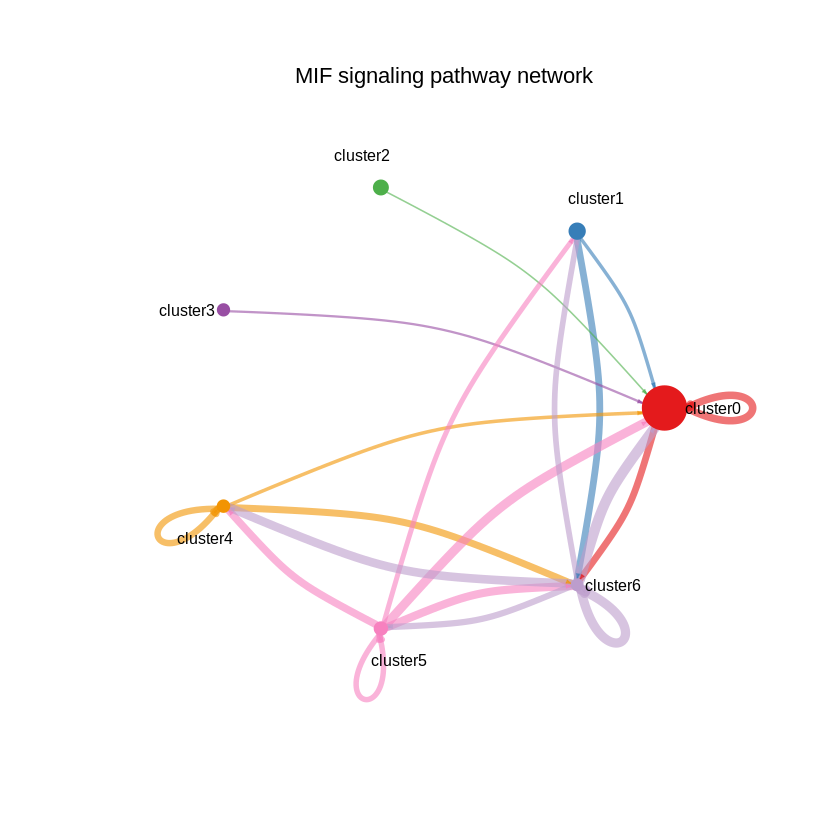

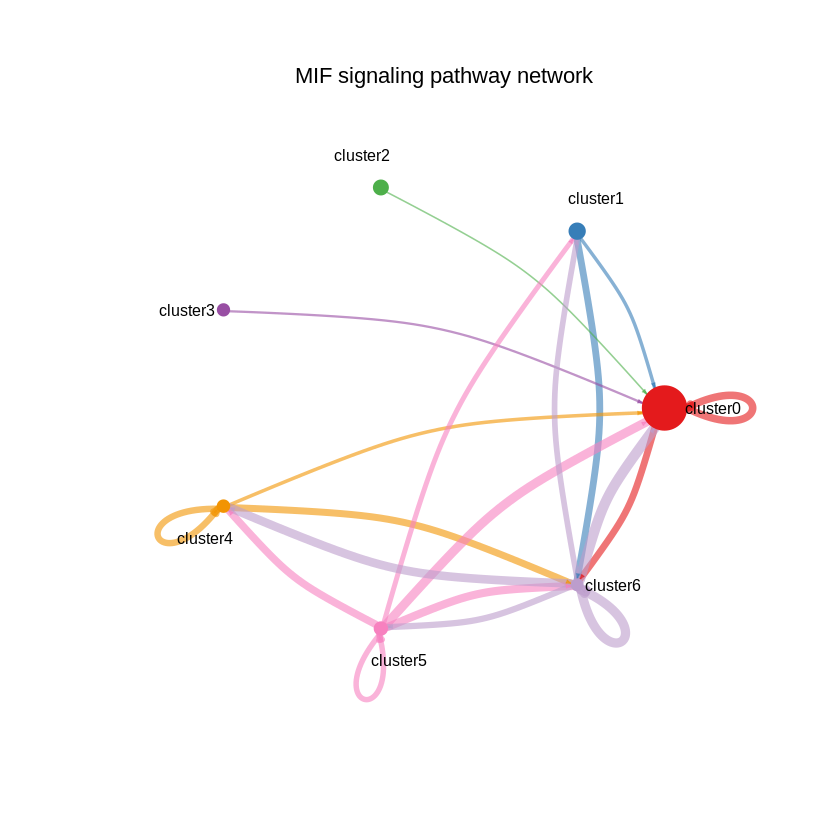

In [81]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MIF" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

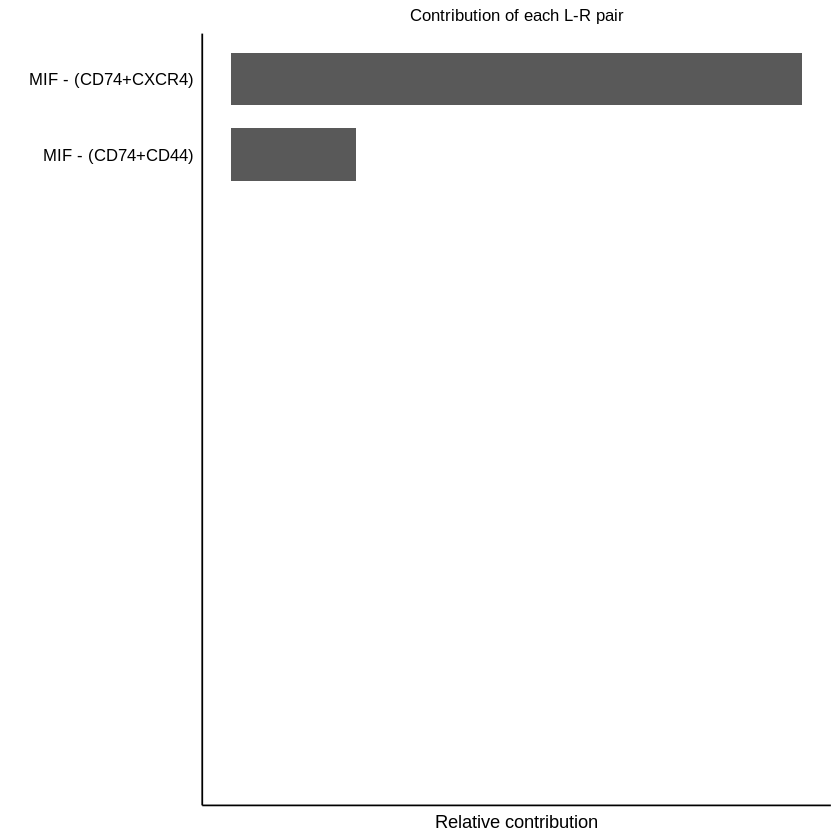

In [82]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

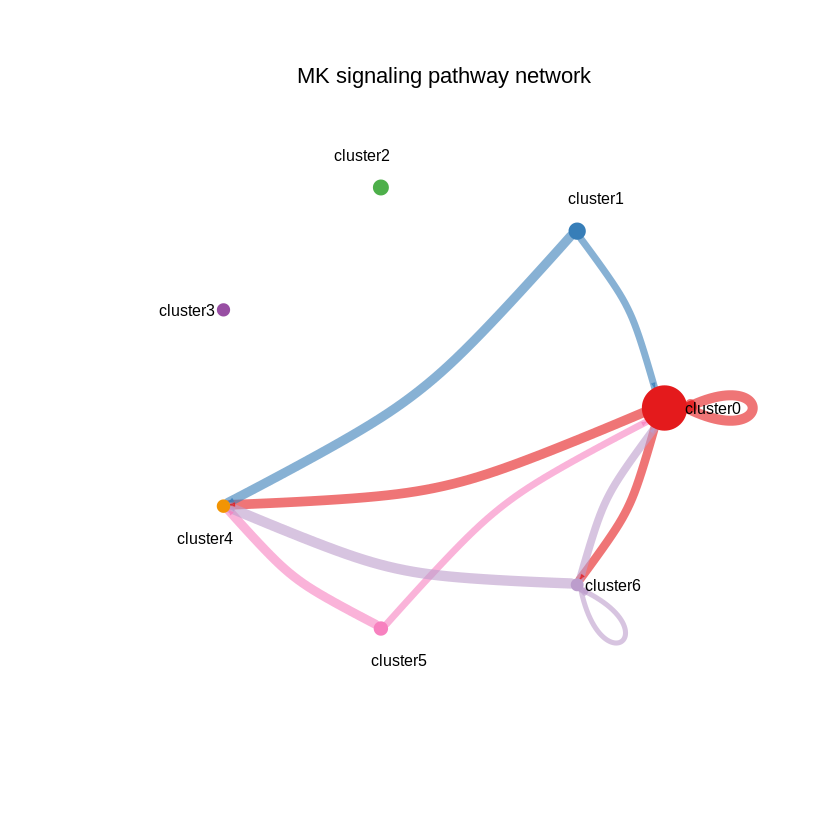

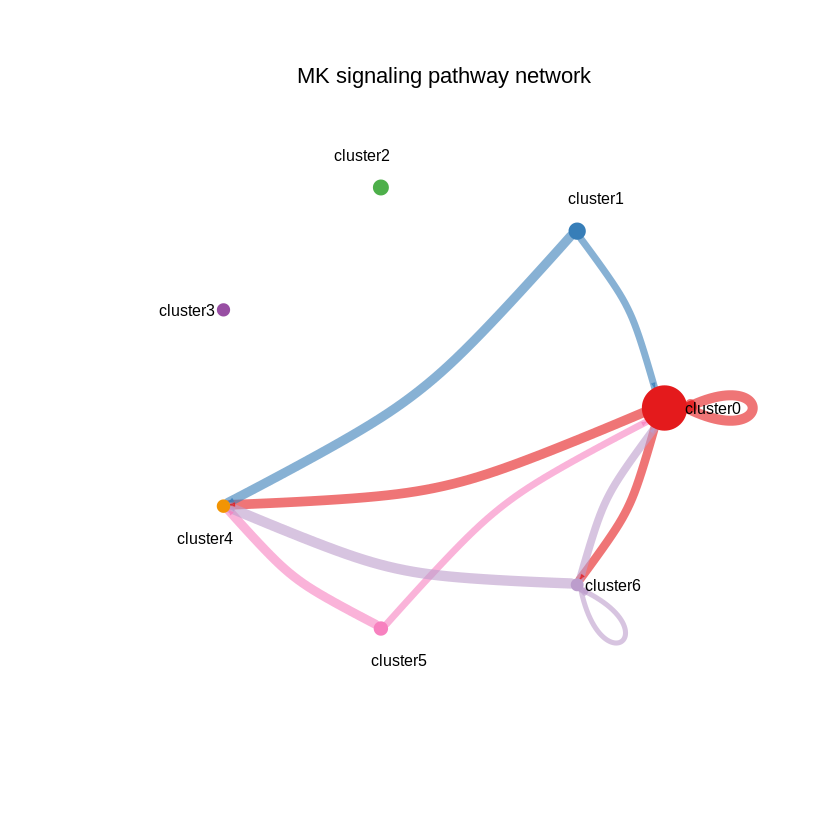

In [83]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MK" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

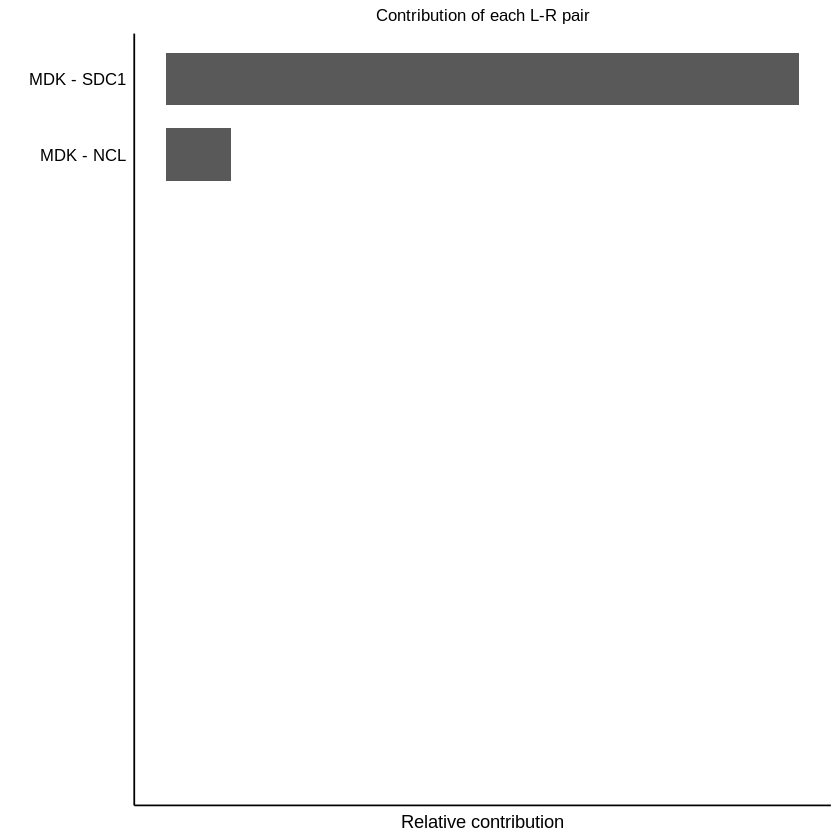

In [84]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

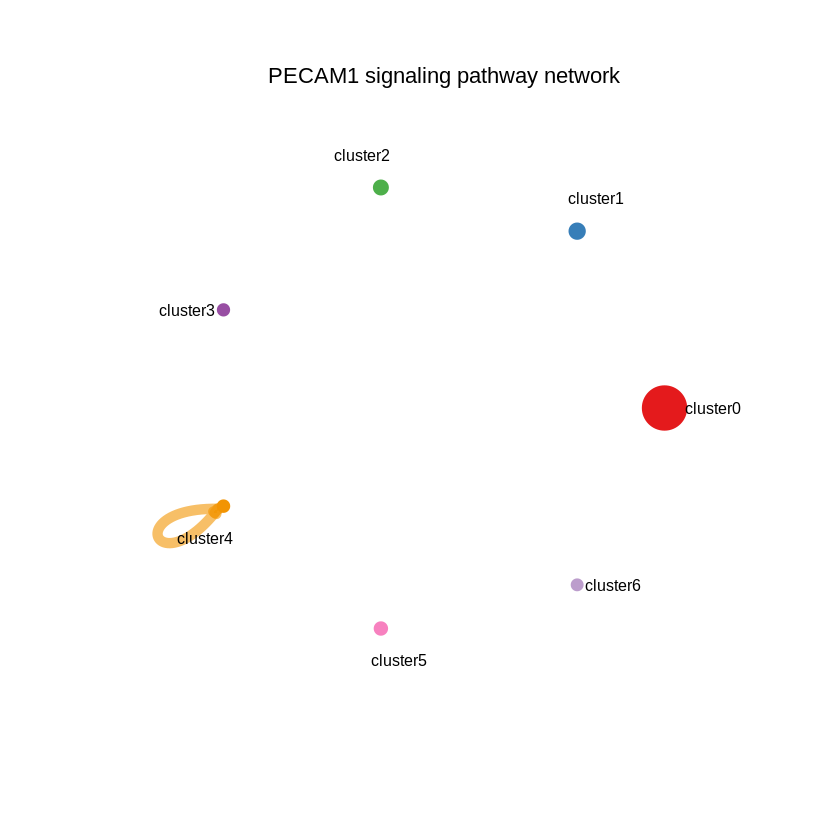

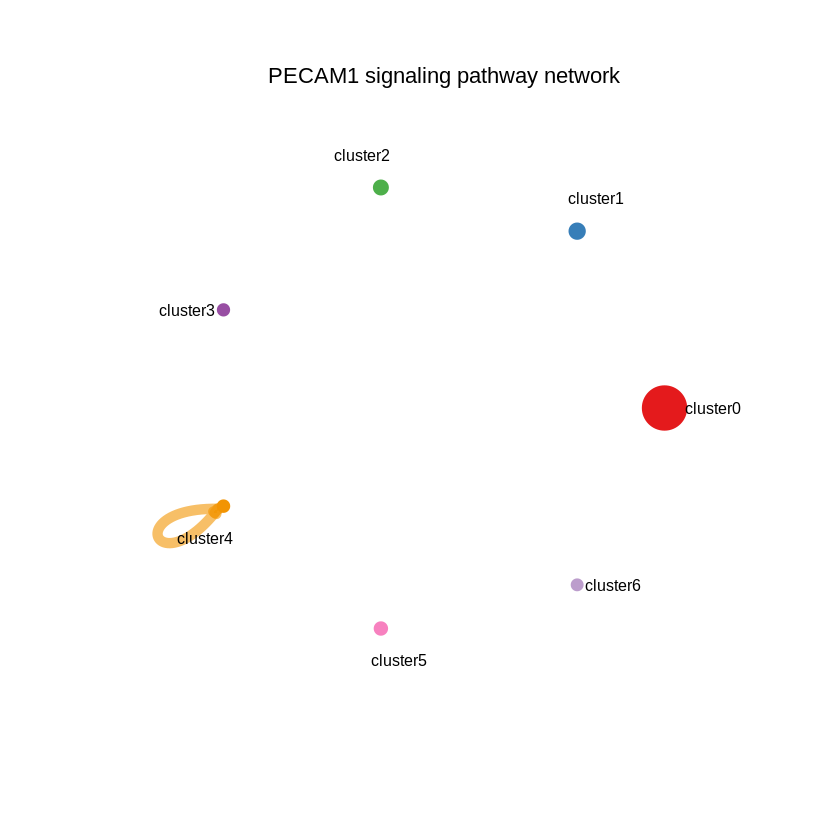

In [85]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "PECAM1" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

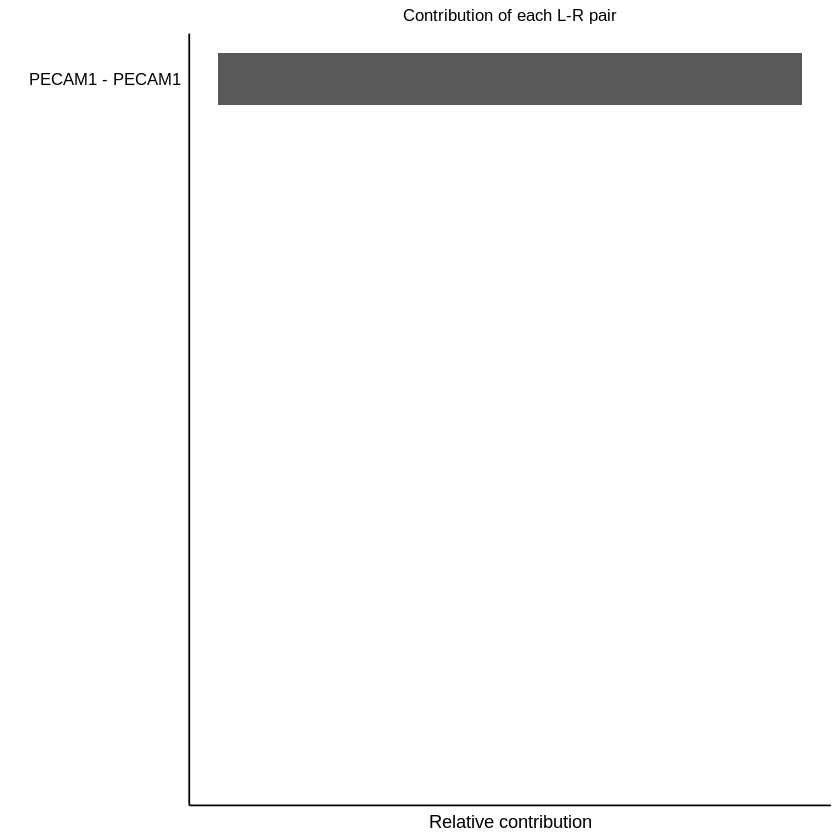

In [86]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

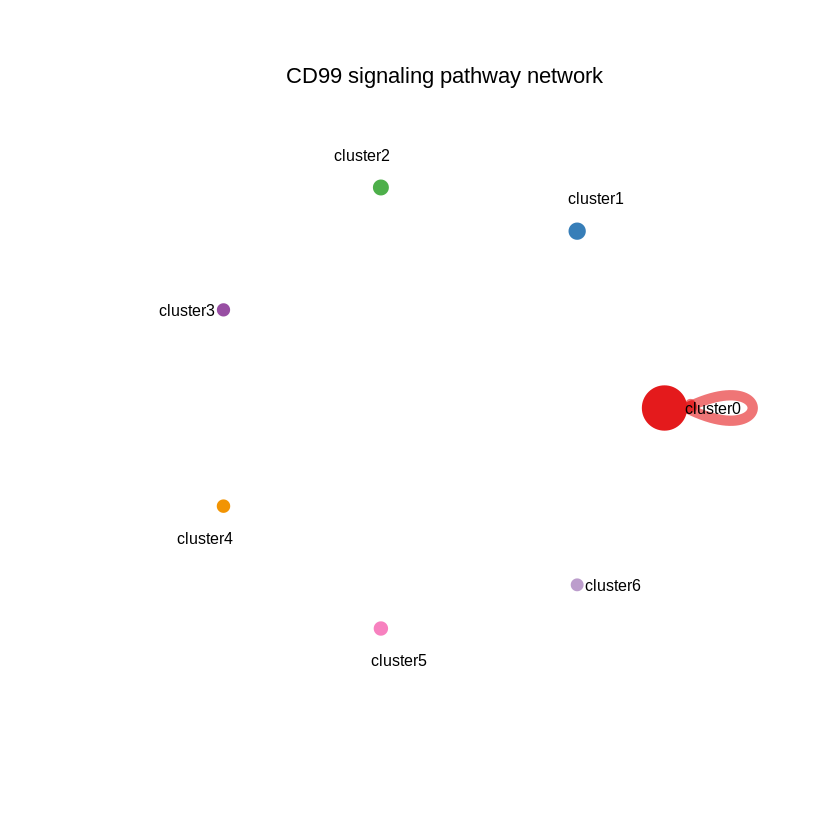

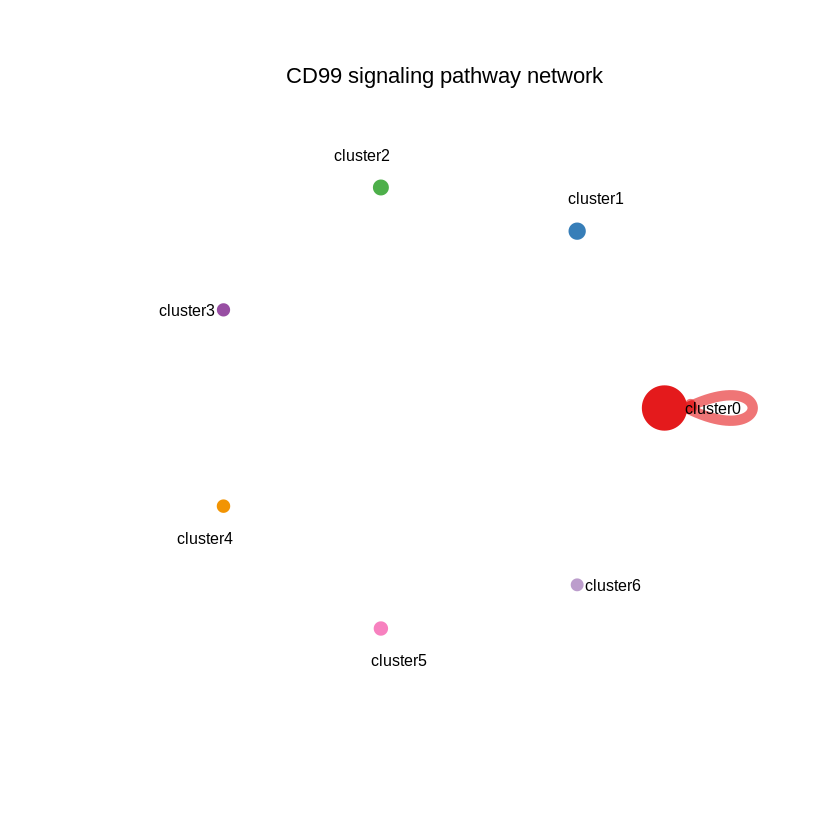

In [87]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "CD99" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

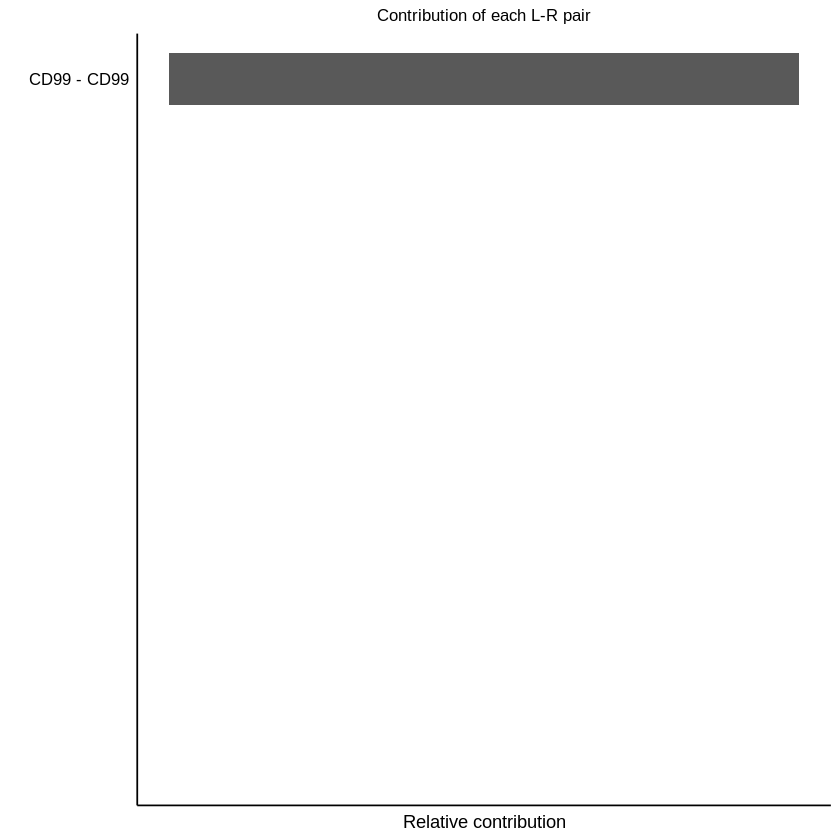

In [88]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

In [89]:
AL<-subset(ob.integrated,orig.ident=='normalPC')

In [90]:
AL

An object of class Seurat 
22868 features across 354 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [91]:
data.input  <- AL@assays$RNA@data
identity = data.frame(group =AL@meta.data$seurat_clusters   , row.names = row.names(AL@meta.data)) # create a dataframe consisting of the cell labels
unique(identity$group) # check the cell labels

[1] 0 3 6 2 4 1 5
Levels: 0 1 2 3 4 5 6

In [92]:
identity$group<-paste('cluster',identity$group,sep='')

In [93]:
cellchat <- createCellChat(data.input)
cellchat

Create a CellChat object from a data matrix



An object of class CellChat created from a single dataset 
 20868 genes.
 354 cells.

In [94]:
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity

In [95]:
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

In [96]:
CellChatDB <- CellChatDB.human 

In [97]:
colnames(CellChatDB$interaction)

[1] "interaction_name"   "pathway_name"       "ligand"            
 [4] "receptor"           "agonist"            "antagonist"        
 [7] "co_A_receptor"      "co_I_receptor"      "evidence"          
[10] "annotation"         "interaction_name_2"

In [98]:
cellchat@DB <- CellChatDB

In [99]:
cellchat <- subsetData(cellchat)

In [100]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [101]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [102]:
cellchat <- projectData(cellchat, PPI.human) 

In [103]:
cellchat <- computeCommunProb(cellchat)

In [104]:
cellchat <- computeCommunProbPathway(cellchat)

In [105]:
cellchat <- aggregateNet(cellchat)

In [106]:
cellchat@netP$pathways

[1] "MIF"    "MK"     "CD99"   "ITGB2"  "PECAM1" "ADGRE5" "OX40"

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

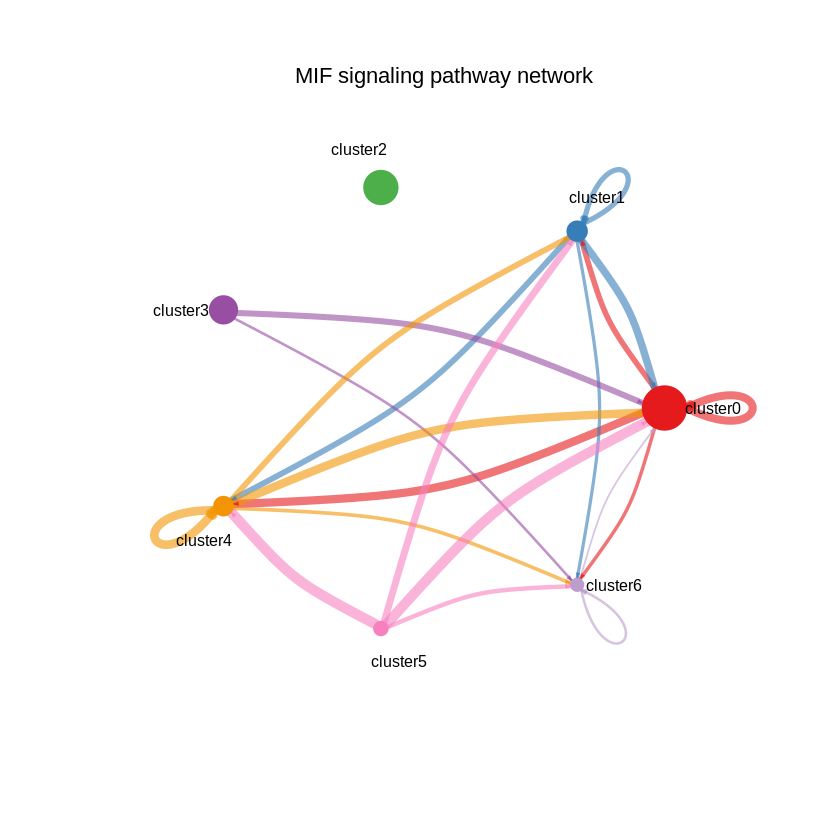

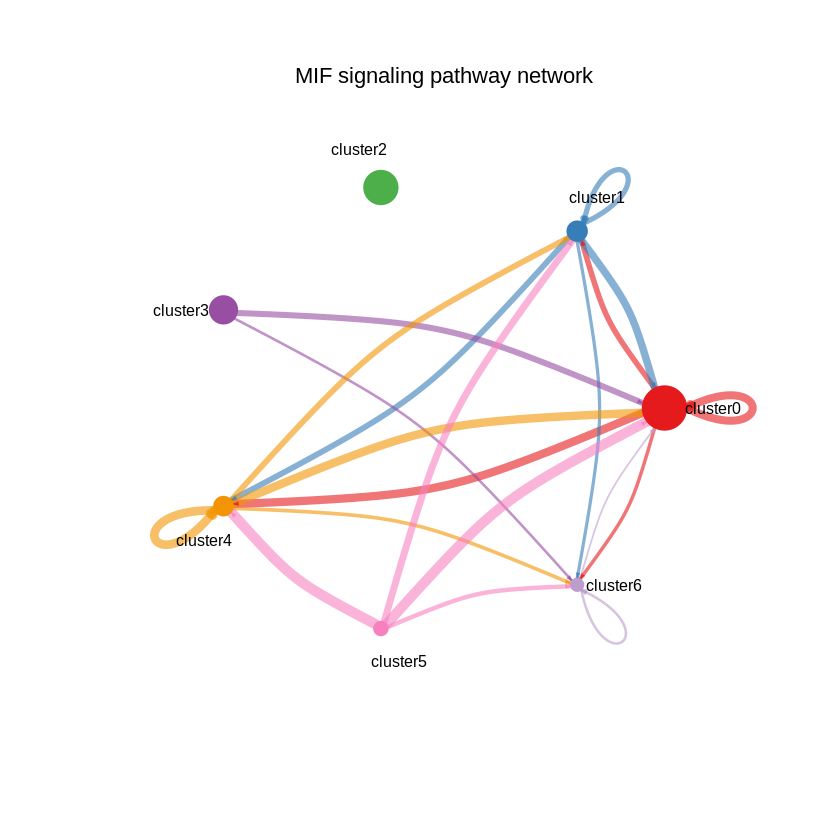

In [107]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MIF" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

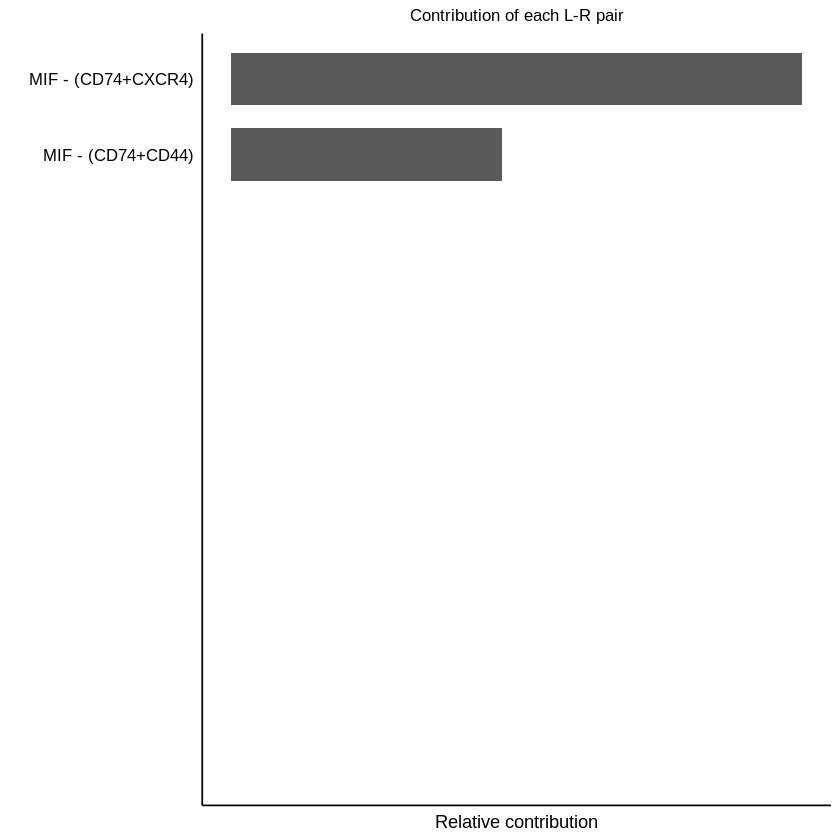

In [108]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

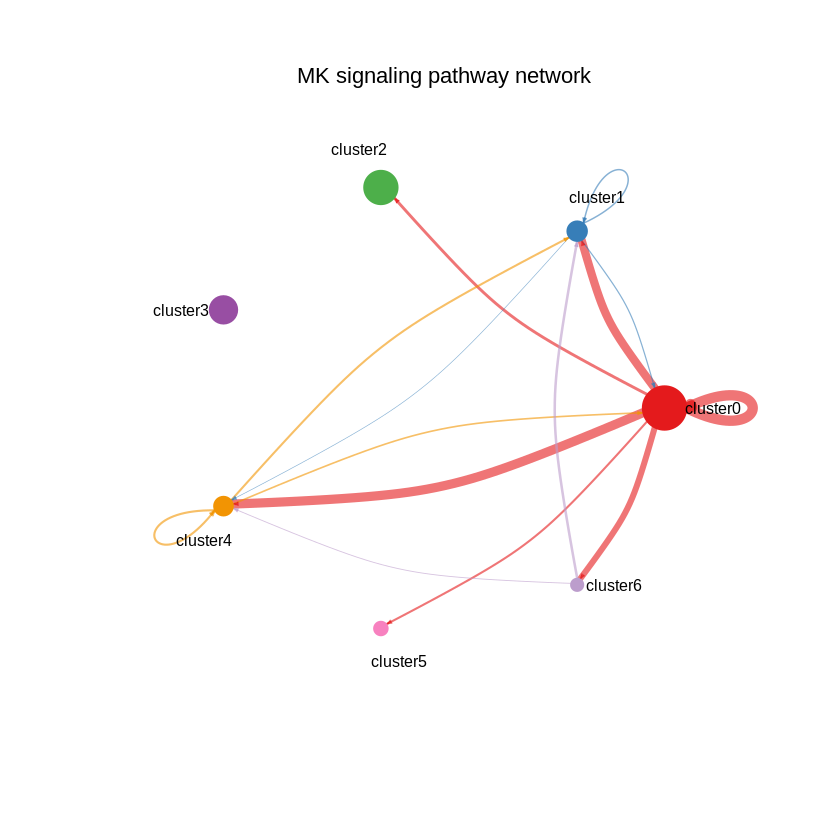

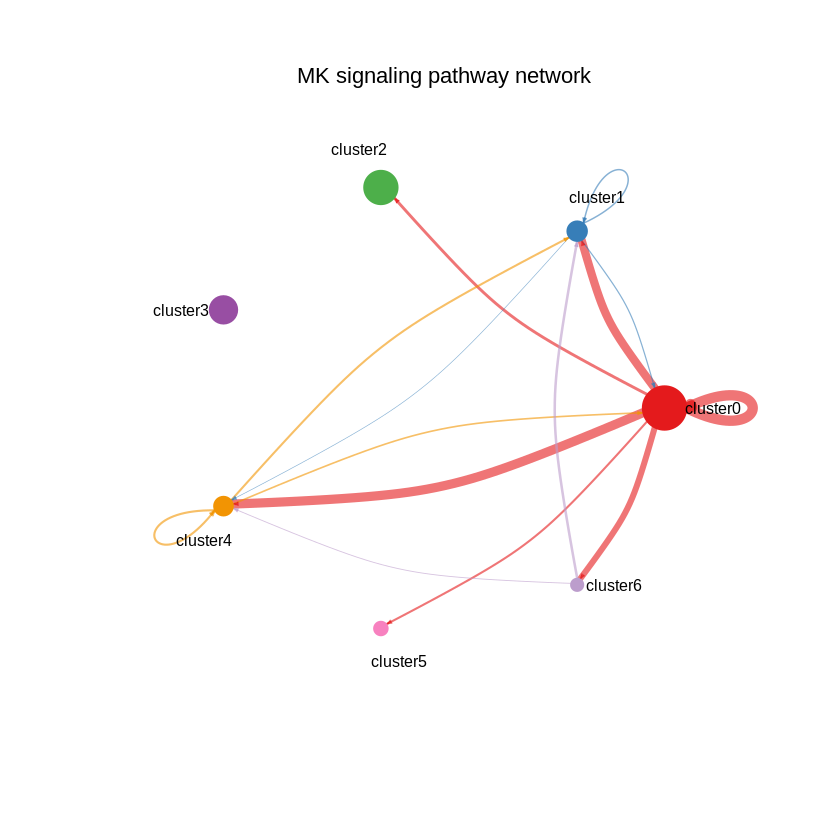

In [109]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MK" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

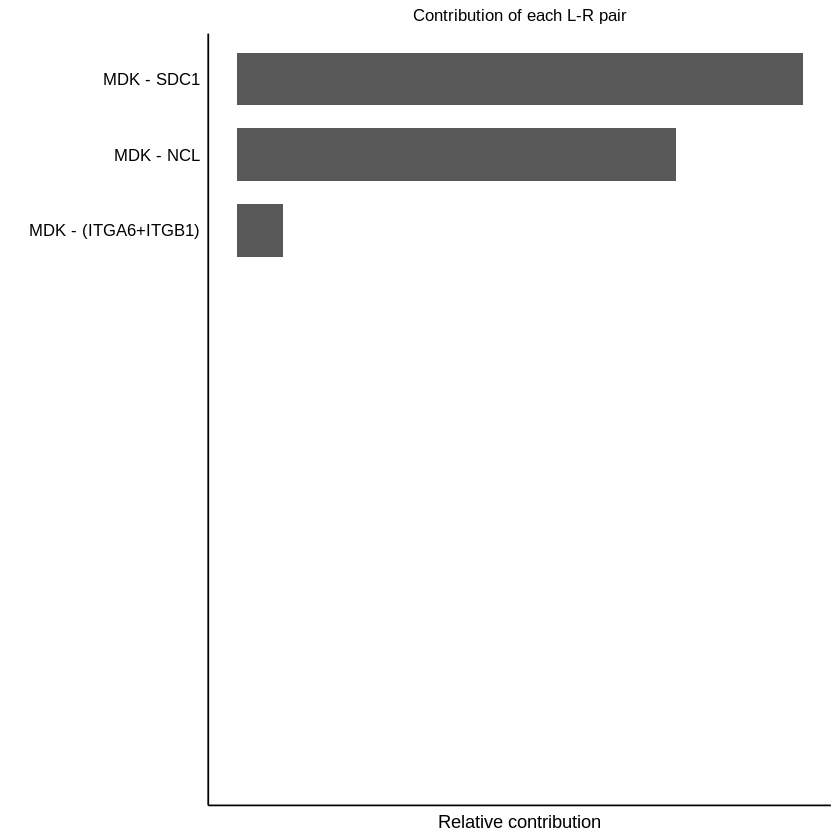

In [110]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

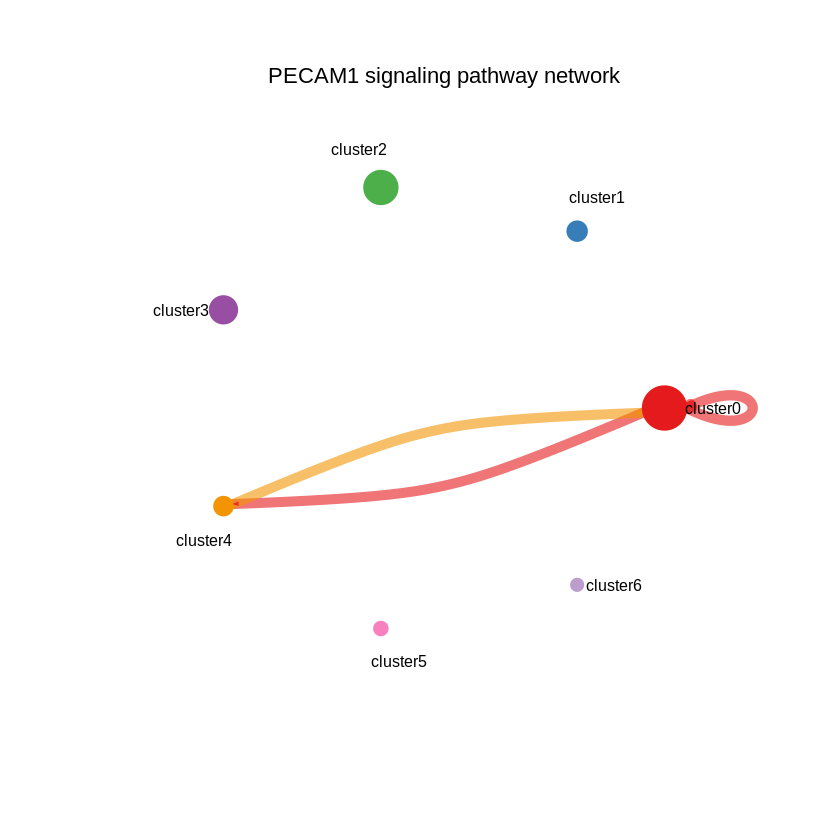

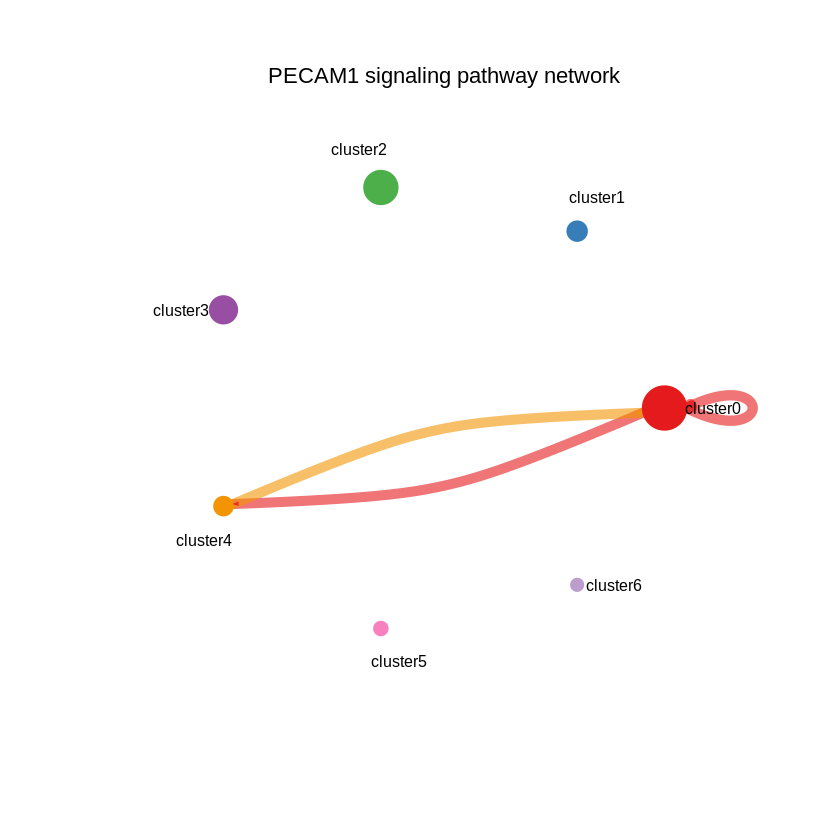

In [111]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "PECAM1" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

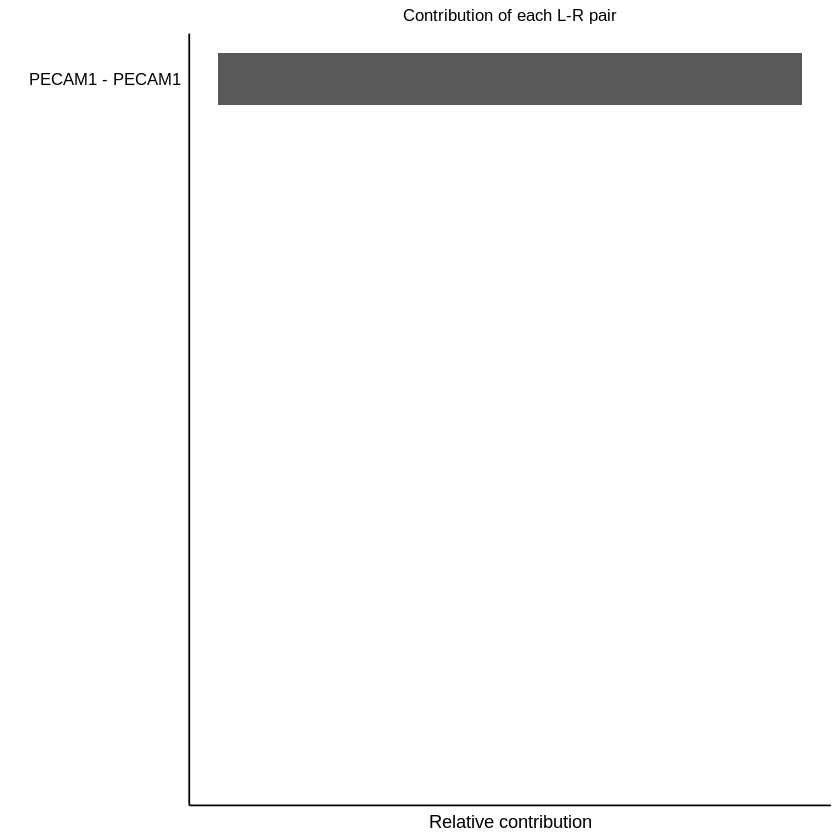

In [112]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

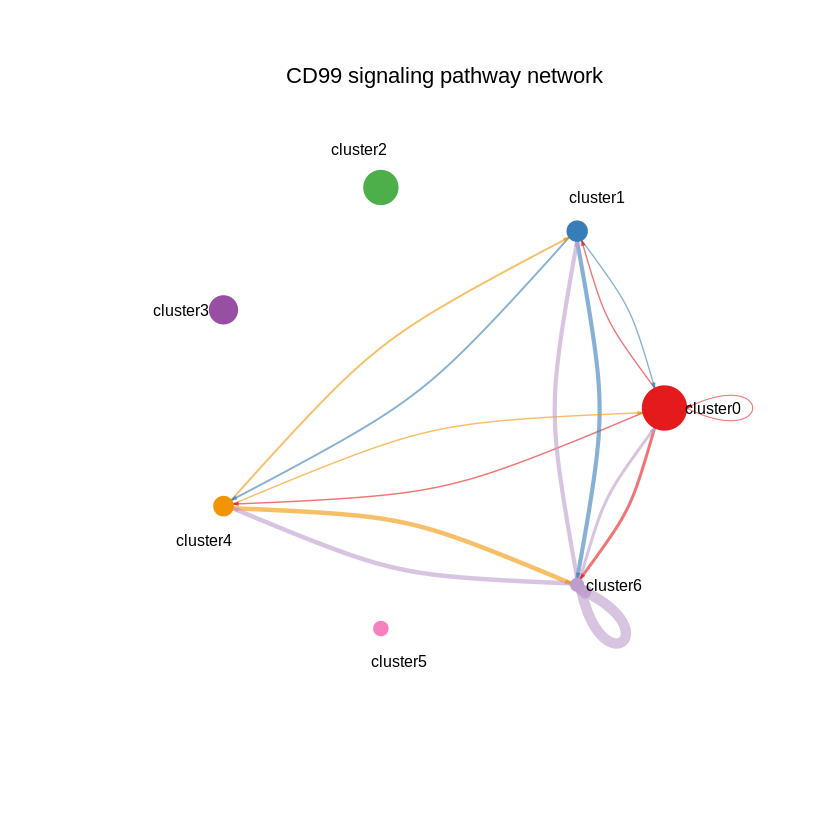

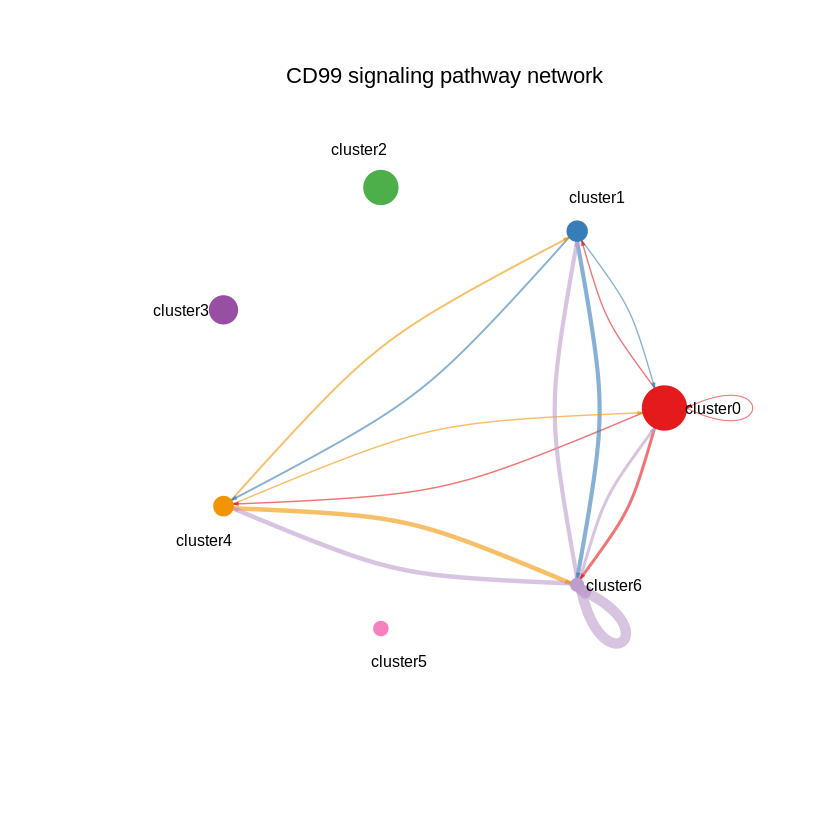

In [113]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "CD99" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

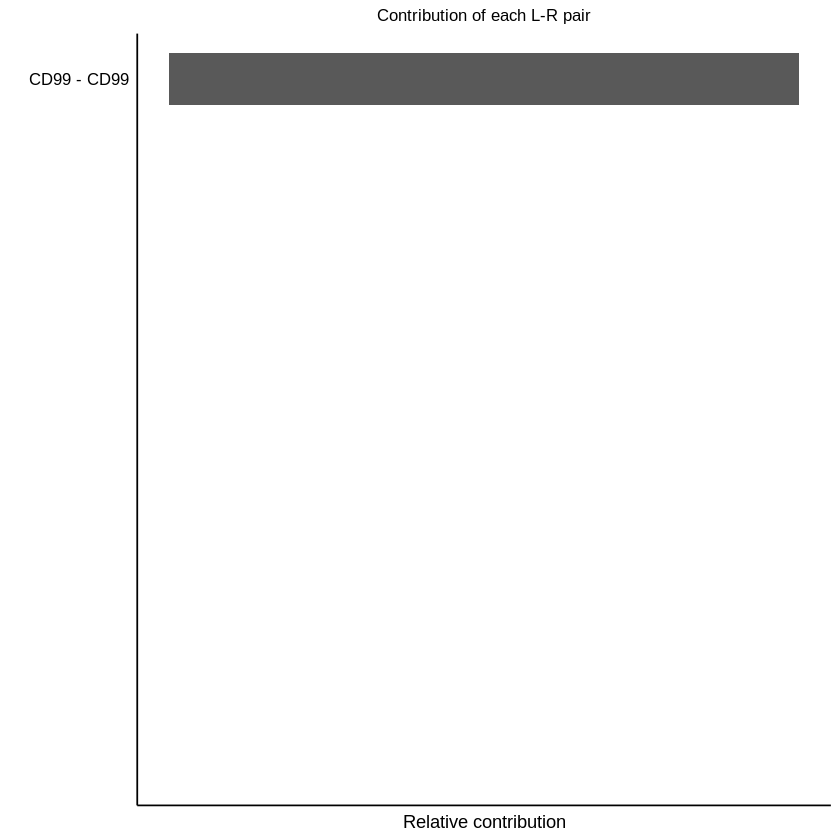

In [114]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

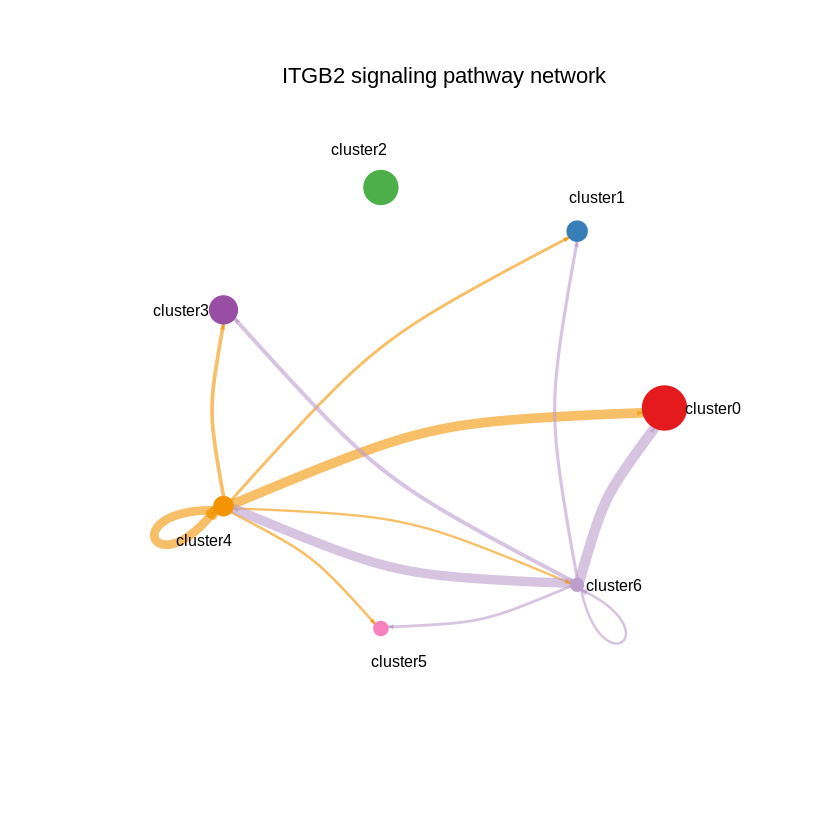

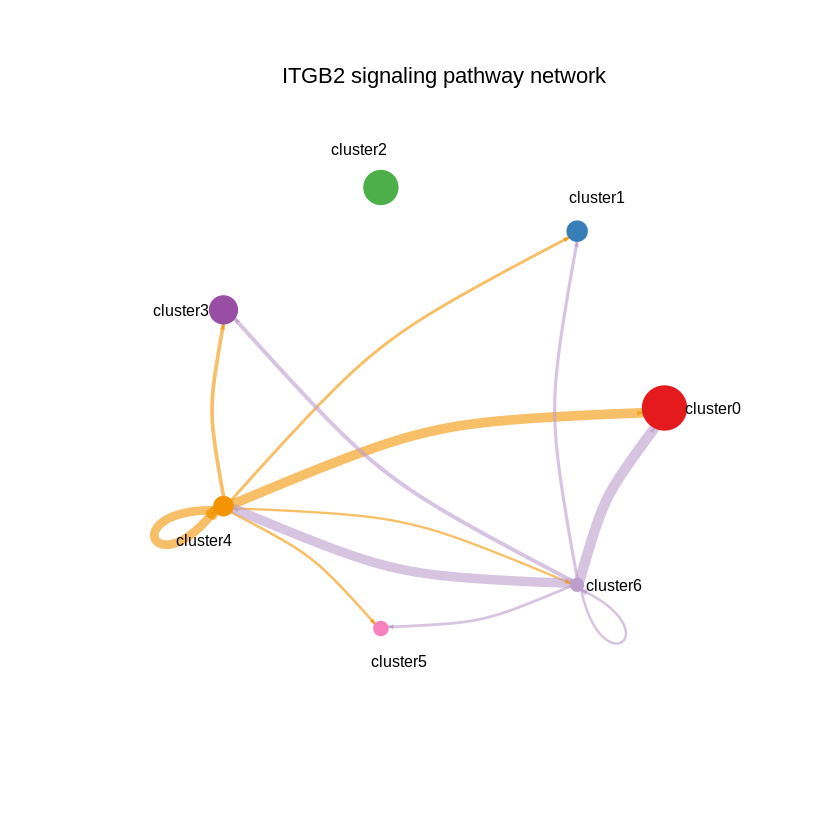

In [115]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "ITGB2" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

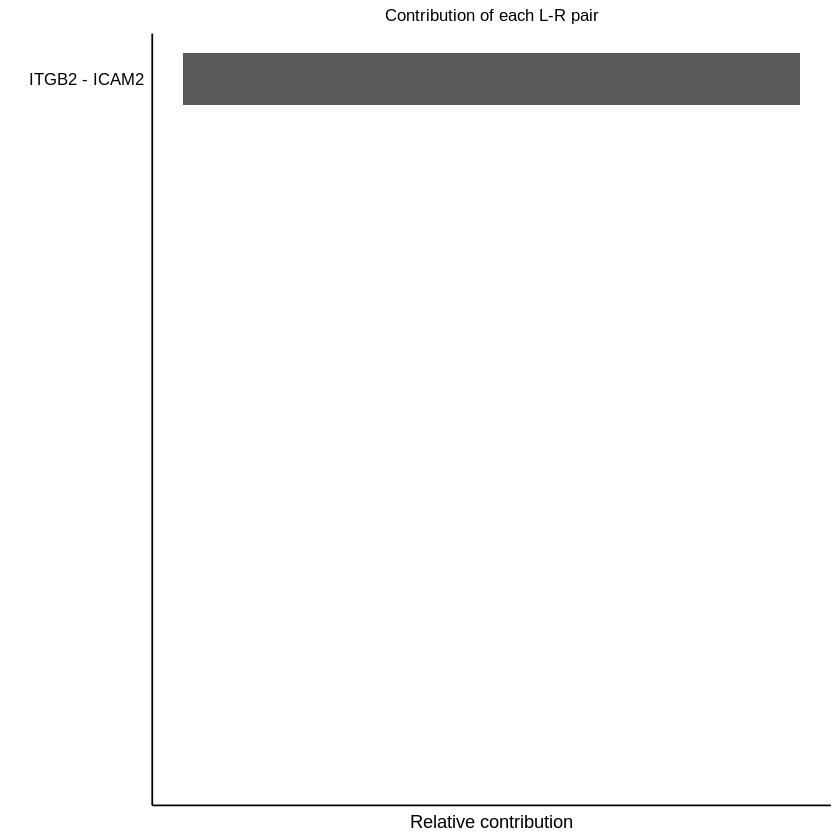

In [116]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

In [28]:
AL<-subset(ob.integrated,orig.ident=='publicPC')

In [29]:
AL

An object of class Seurat 
22868 features across 717 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [30]:
data.input  <- AL@assays$RNA@data
identity = data.frame(group =AL@meta.data$seurat_clusters   , row.names = row.names(AL@meta.data)) # create a dataframe consisting of the cell labels
unique(identity$group) # check the cell labels

[1] 0 1 4 3 5 2 6
Levels: 0 1 2 3 4 5 6

In [31]:
identity$group<-paste('cluster',identity$group,sep='')

In [32]:
cellchat <- createCellChat(data.input)
cellchat

Create a CellChat object from a data matrix



An object of class CellChat created from a single dataset 
 20868 genes.
 717 cells.

In [33]:
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity

In [34]:
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

In [35]:
CellChatDB <- CellChatDB.human 

In [36]:
colnames(CellChatDB$interaction)

[1] "interaction_name"   "pathway_name"       "ligand"            
 [4] "receptor"           "agonist"            "antagonist"        
 [7] "co_A_receptor"      "co_I_receptor"      "evidence"          
[10] "annotation"         "interaction_name_2"

In [37]:
cellchat@DB <- CellChatDB

In [38]:
cellchat <- subsetData(cellchat)

In [39]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [40]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [41]:
cellchat <- projectData(cellchat, PPI.human) 

In [42]:
cellchat <- computeCommunProb(cellchat)

In [43]:
cellchat <- computeCommunProbPathway(cellchat)

In [44]:
cellchat <- aggregateNet(cellchat)

In [45]:
cellchat@netP$pathways

[1] "MIF"    "CD99"   "MK"     "ITGB2"  "BAFF"   "ICAM"   "PECAM1" "ADGRE5"
 [9] "SELPLG" "BTLA"

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

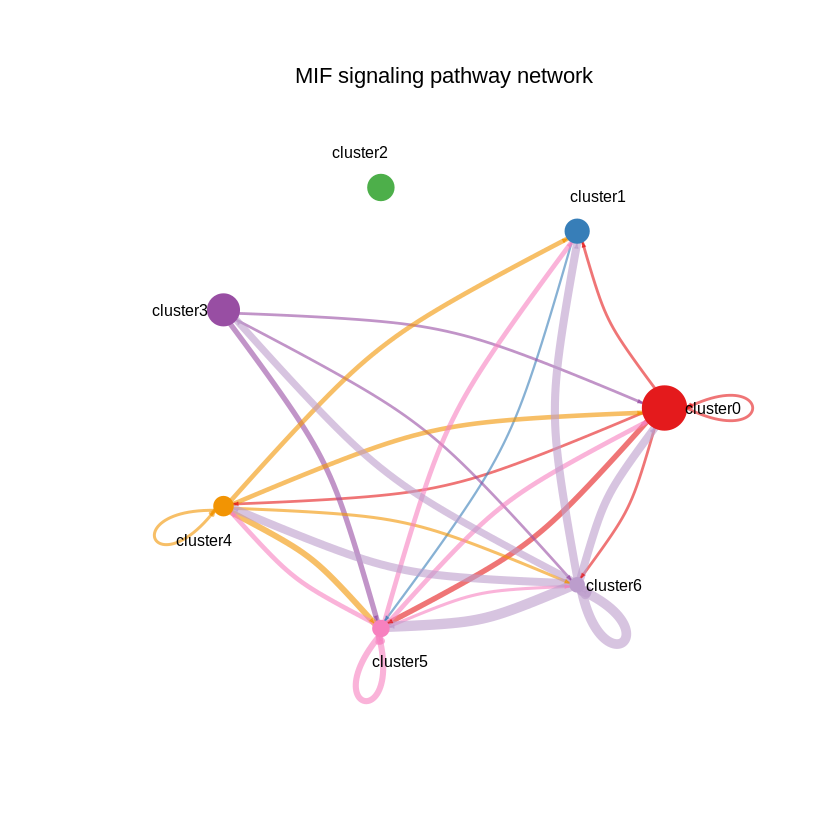

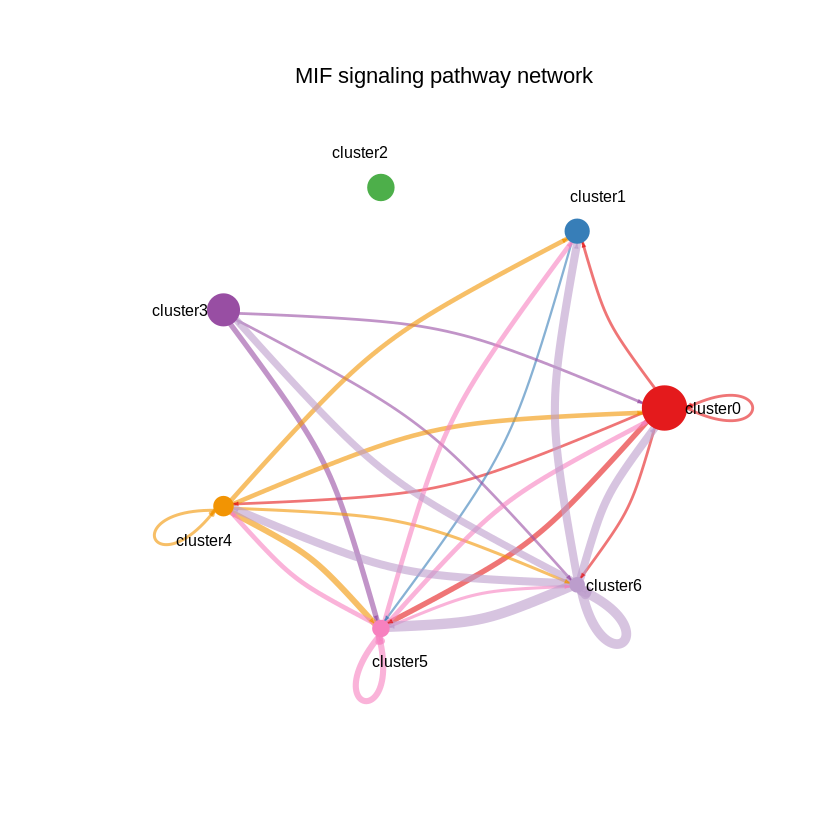

In [46]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MIF" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

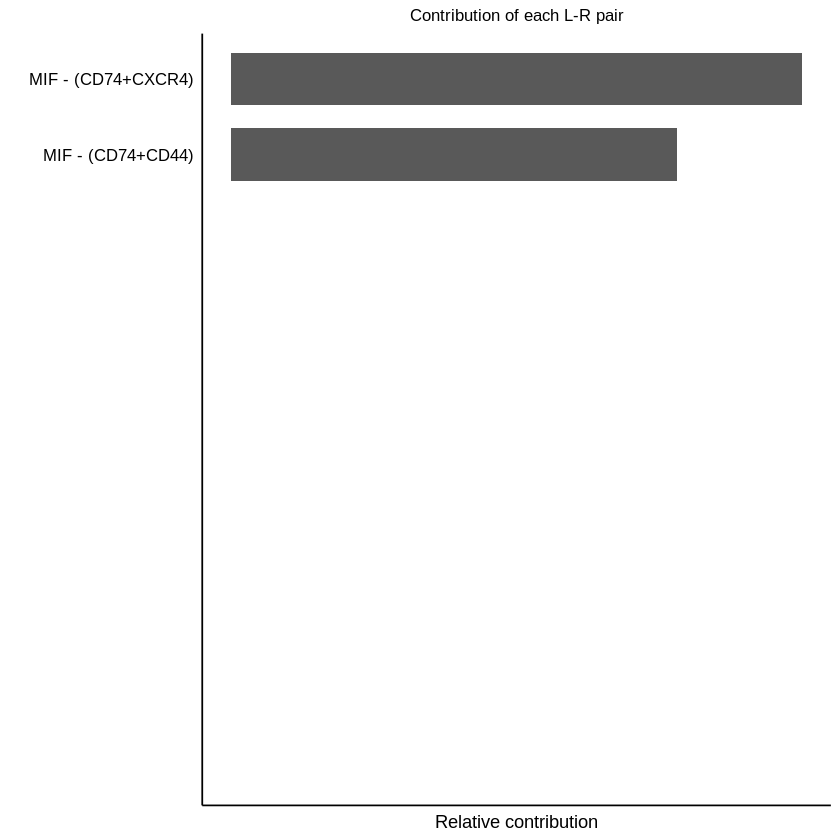

In [47]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

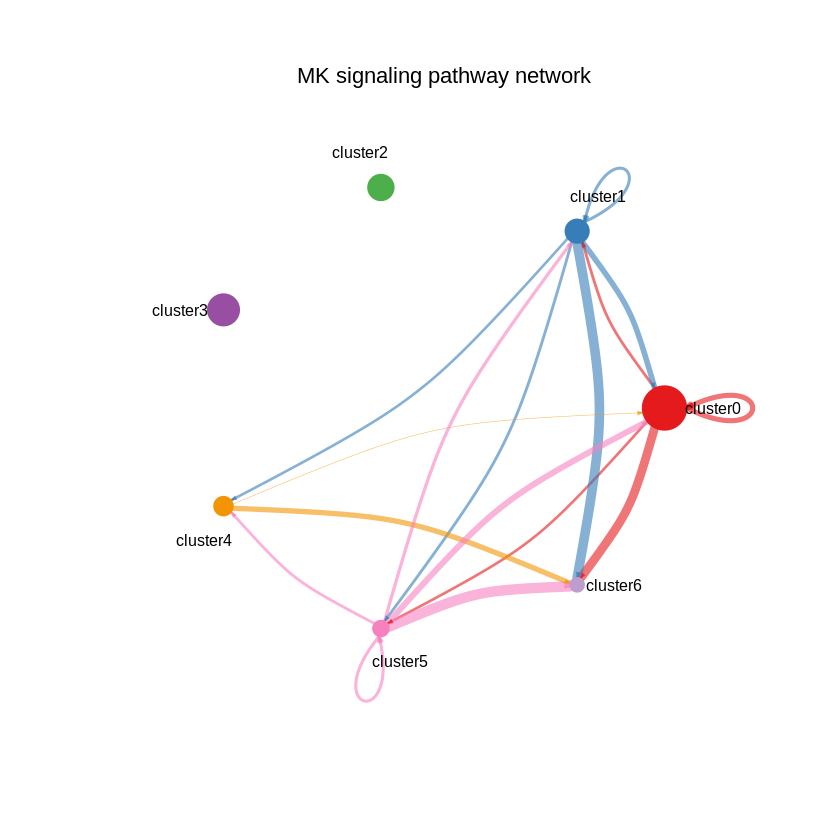

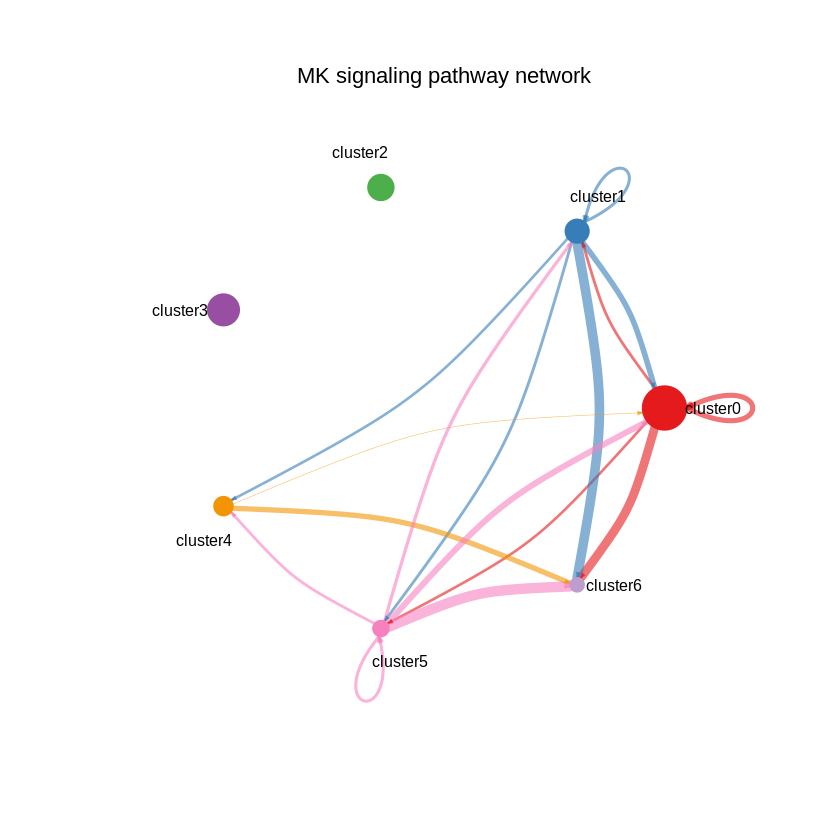

In [48]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MK" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

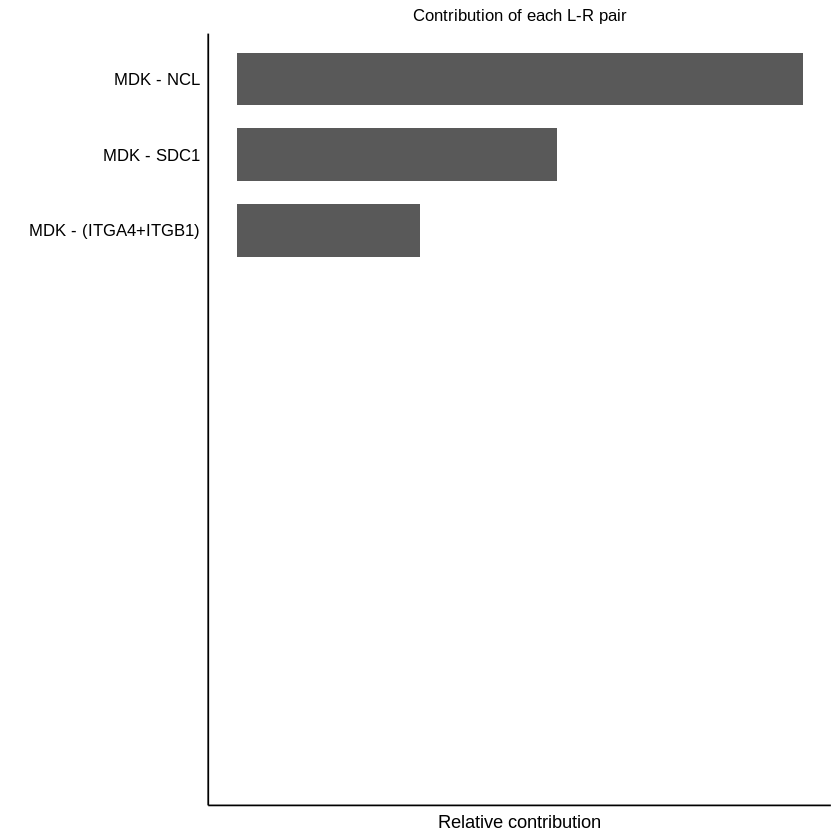

In [49]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

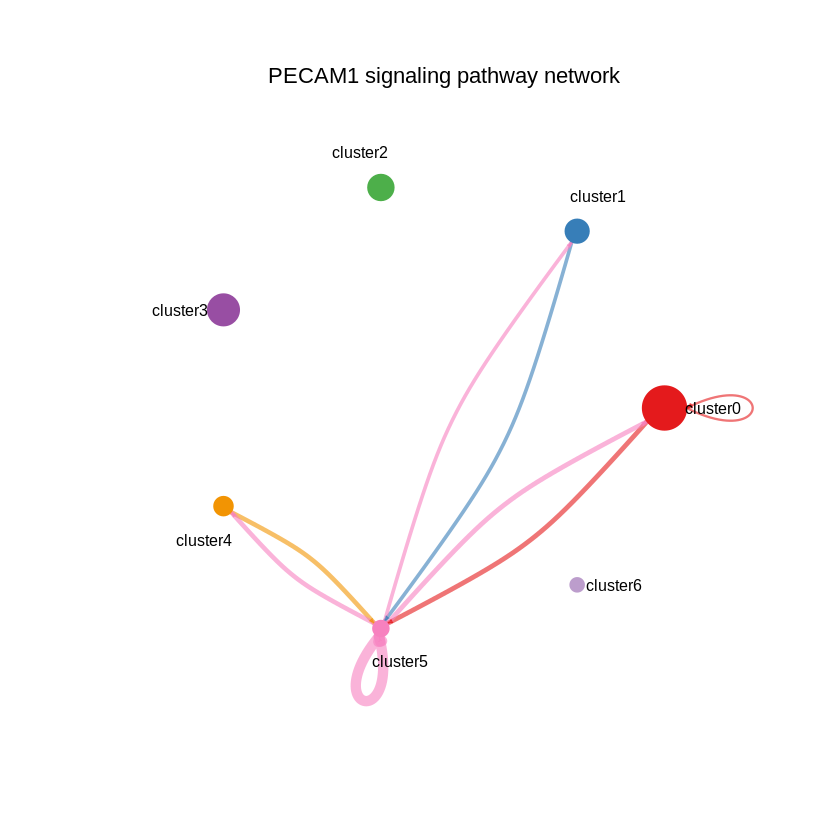

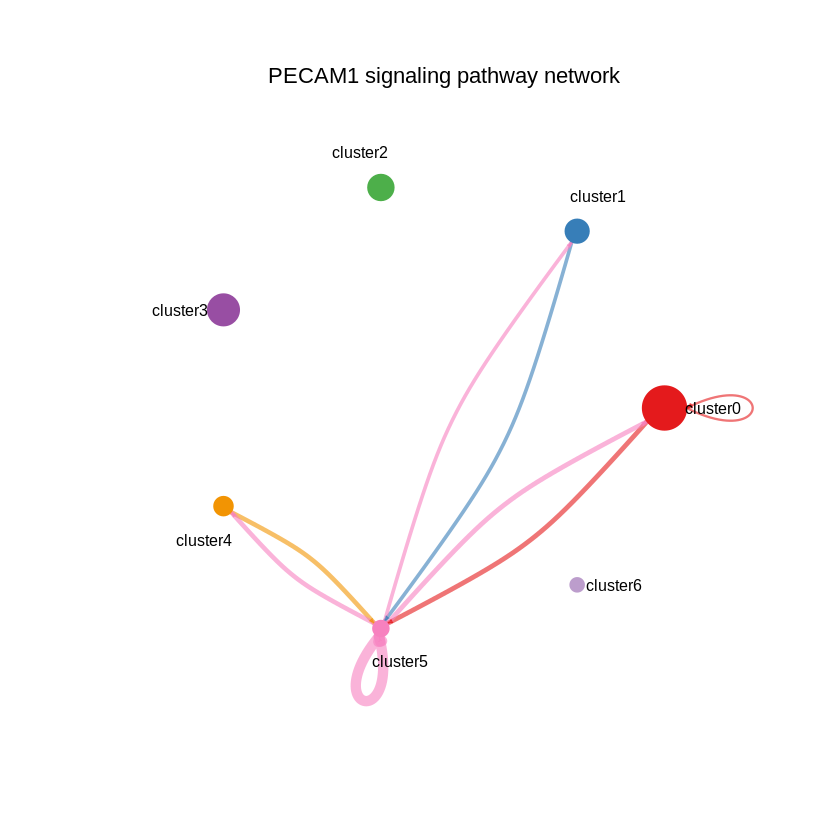

In [50]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "PECAM1" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

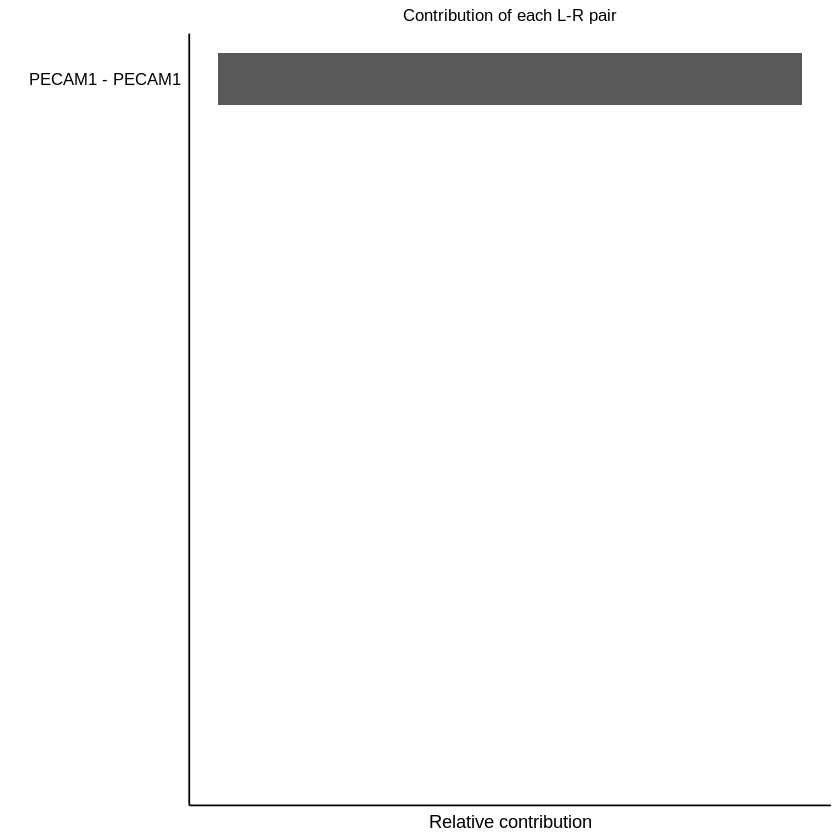

In [51]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

In [4]:
AL<-subset(ob.integrated,orig.ident=='MGUSPC1')

In [5]:
AL

An object of class Seurat 
22868 features across 1550 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
data.input  <- AL@assays$RNA@data
identity = data.frame(group =AL@meta.data$seurat_clusters   , row.names = row.names(AL@meta.data)) # create a dataframe consisting of the cell labels
unique(identity$group) # check the cell labels

[1] 1 0 2 3 6 4 5
Levels: 0 1 2 3 4 5 6

In [7]:
identity$group<-paste('cluster',identity$group,sep='')

In [8]:
cellchat <- createCellChat(data.input)
cellchat

Create a CellChat object from a data matrix



An object of class CellChat created from a single dataset 
 20868 genes.
 1550 cells.

In [9]:
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity

In [10]:
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

In [11]:
CellChatDB <- CellChatDB.human 

In [12]:
colnames(CellChatDB$interaction)

[1] "interaction_name"   "pathway_name"       "ligand"            
 [4] "receptor"           "agonist"            "antagonist"        
 [7] "co_A_receptor"      "co_I_receptor"      "evidence"          
[10] "annotation"         "interaction_name_2"

In [13]:
cellchat@DB <- CellChatDB

In [14]:
cellchat <- subsetData(cellchat)

In [15]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [16]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [17]:
cellchat <- projectData(cellchat, PPI.human) 

In [18]:
cellchat <- computeCommunProb(cellchat)

In [19]:
cellchat <- computeCommunProbPathway(cellchat)

In [20]:
cellchat <- aggregateNet(cellchat)

In [21]:
cellchat@netP$pathways

[1] "MK"     "MIF"    "PECAM1" "CD99"   "MPZ"

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

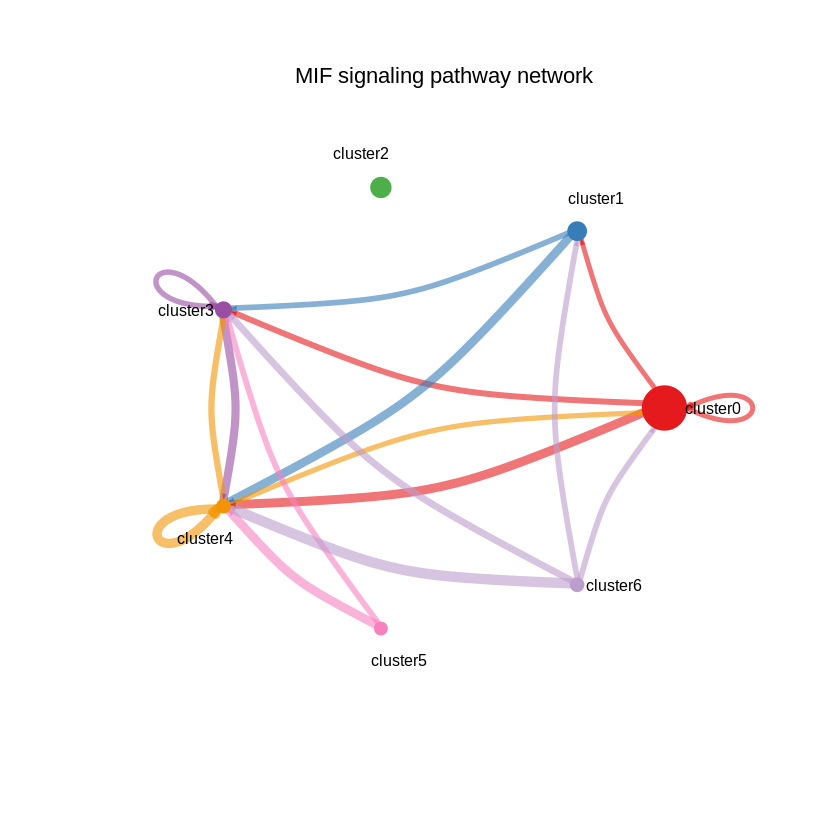

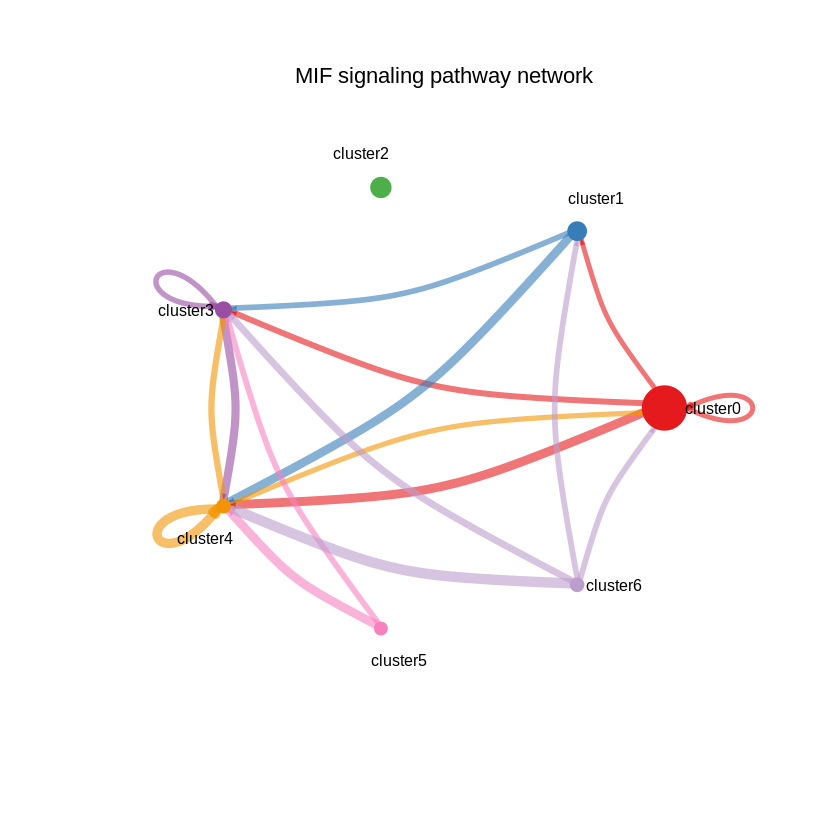

In [24]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MIF" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

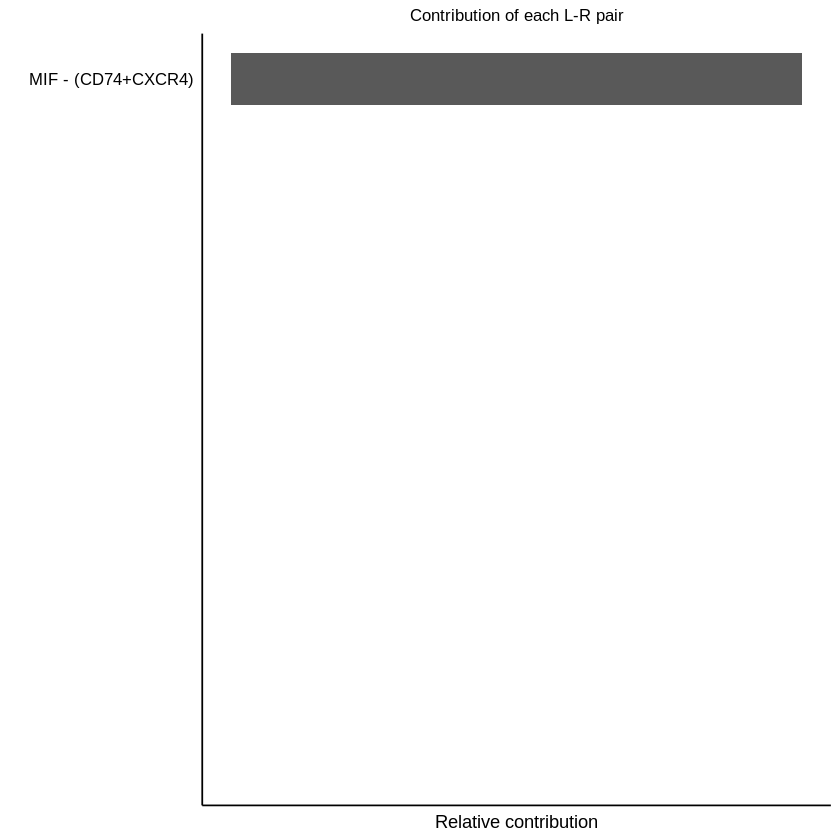

In [25]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

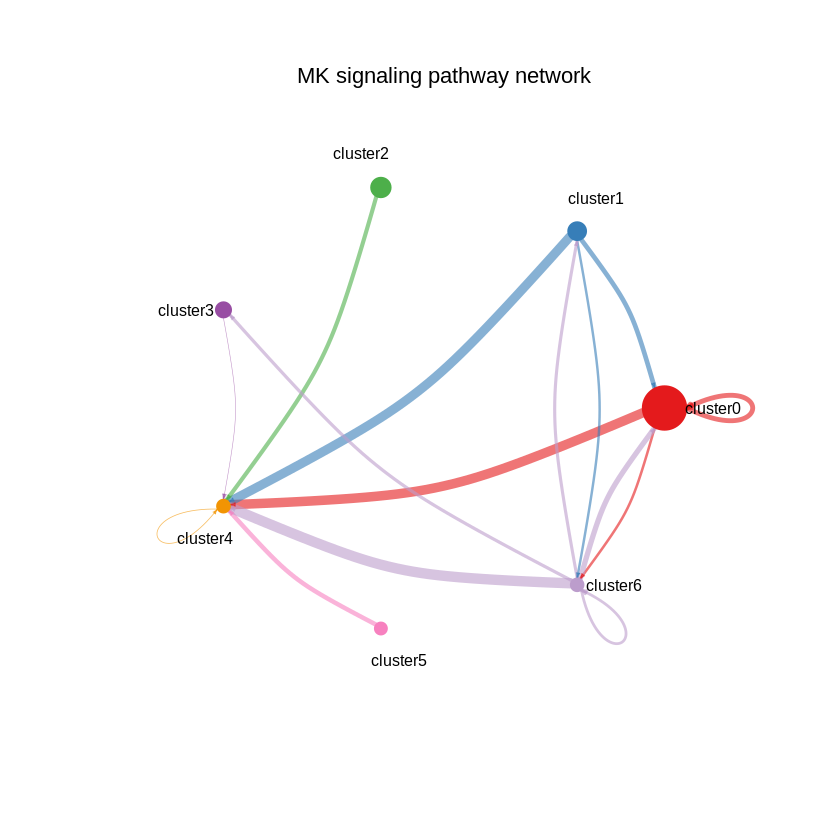

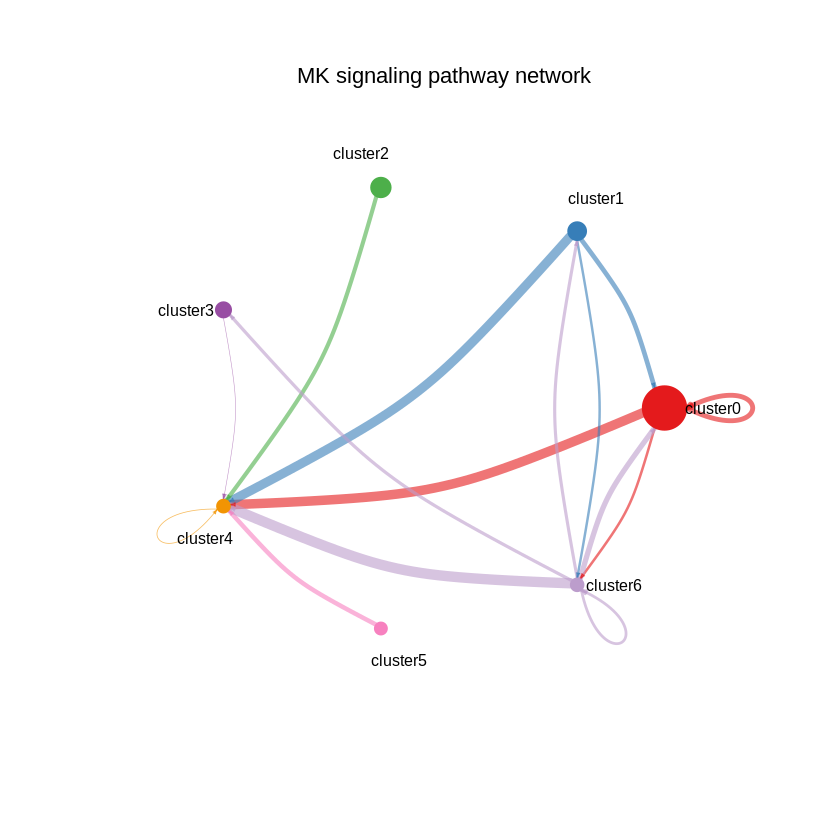

In [26]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MK" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

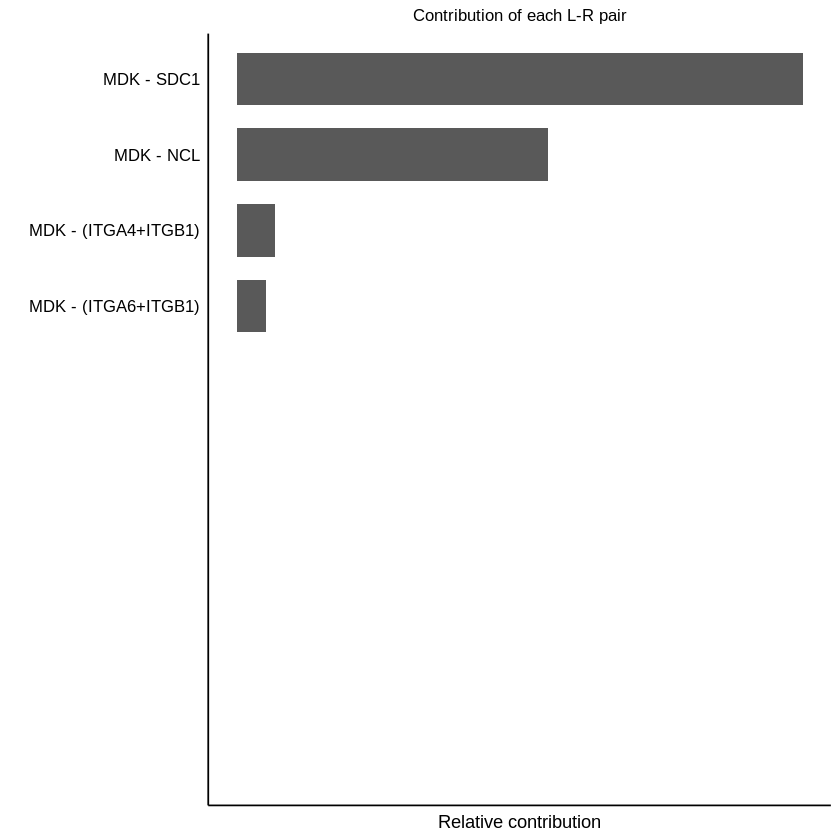

In [27]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

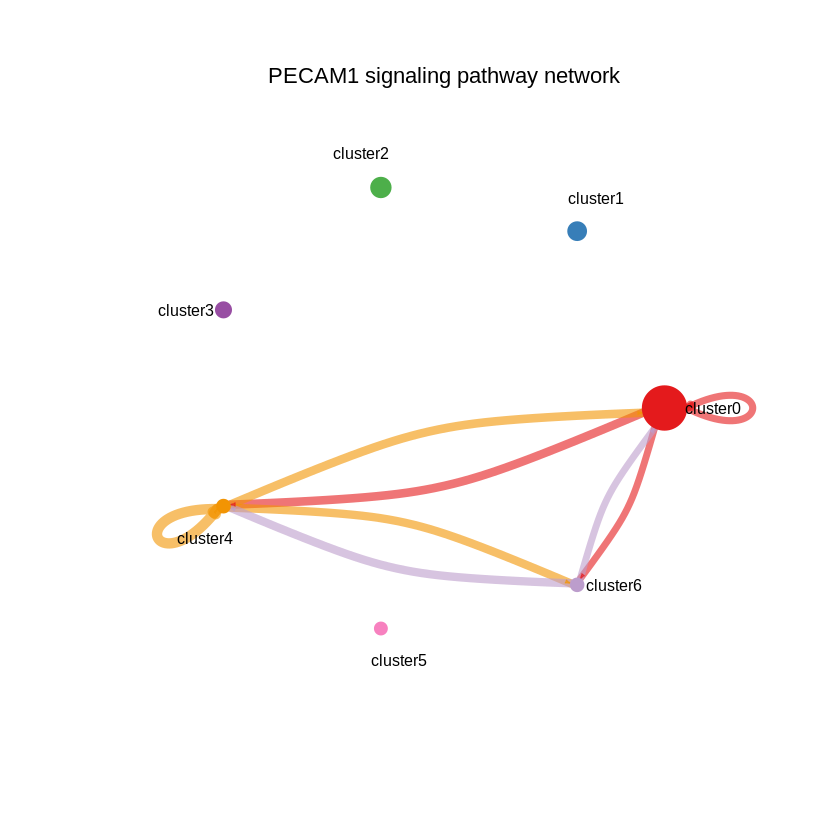

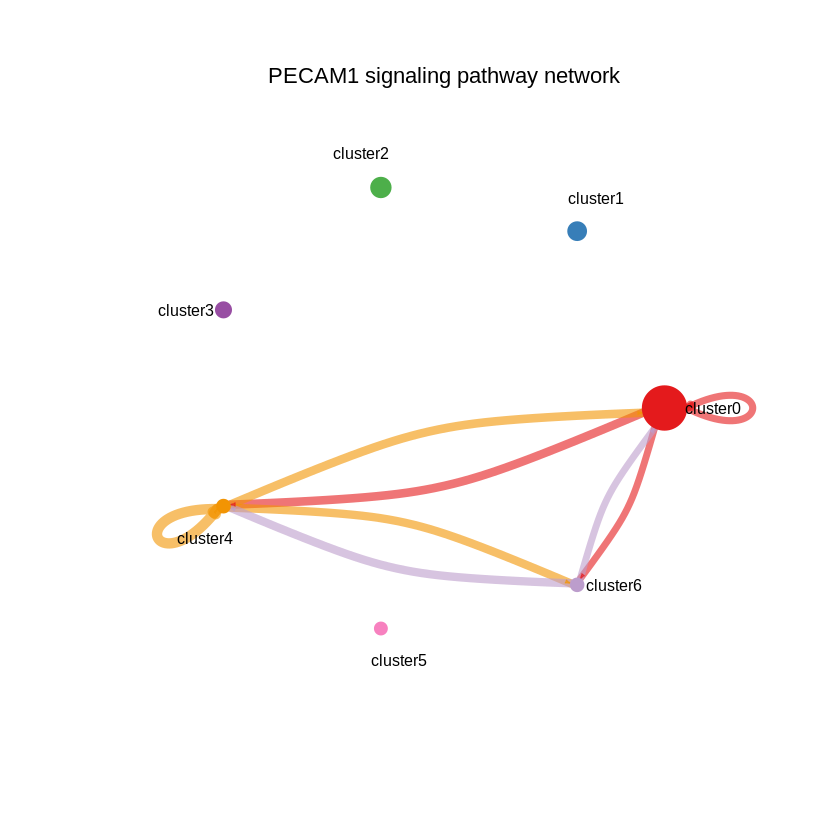

In [28]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "PECAM1" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

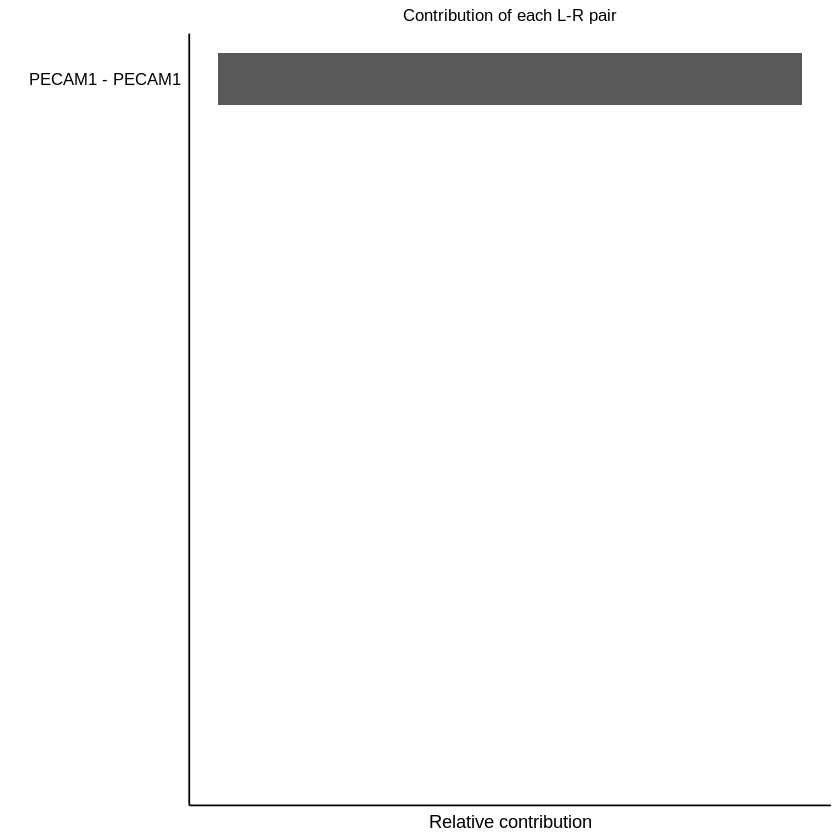

In [29]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

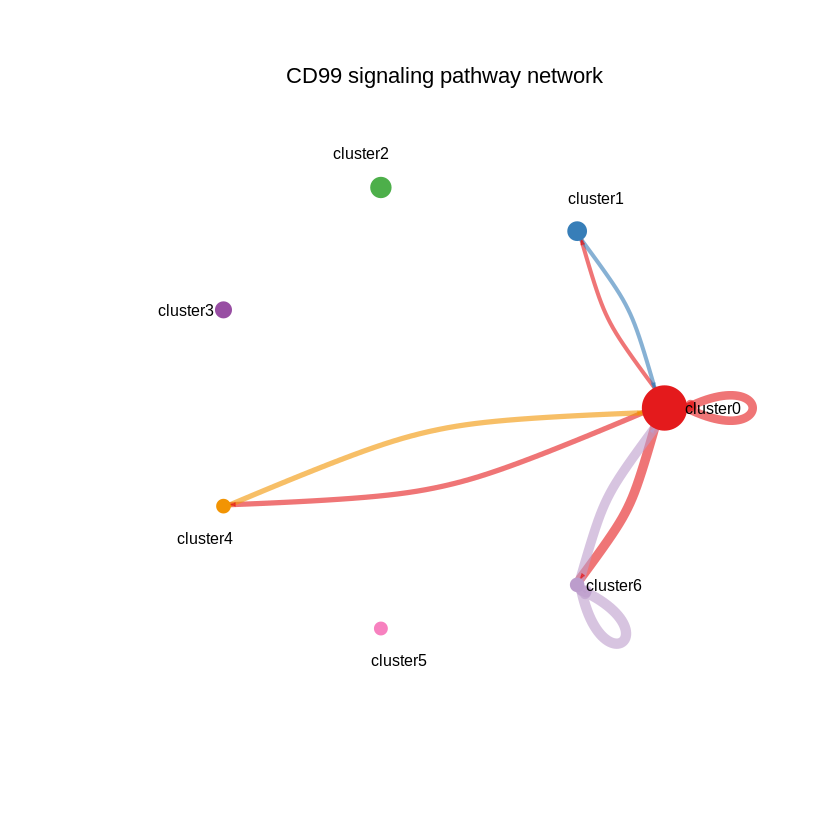

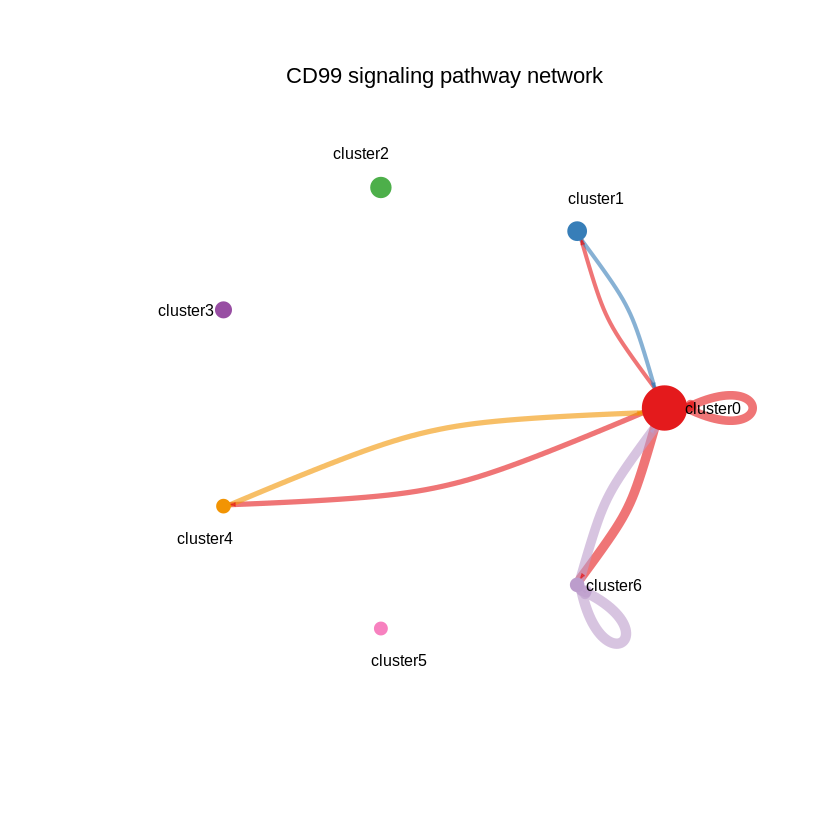

In [30]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "CD99" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

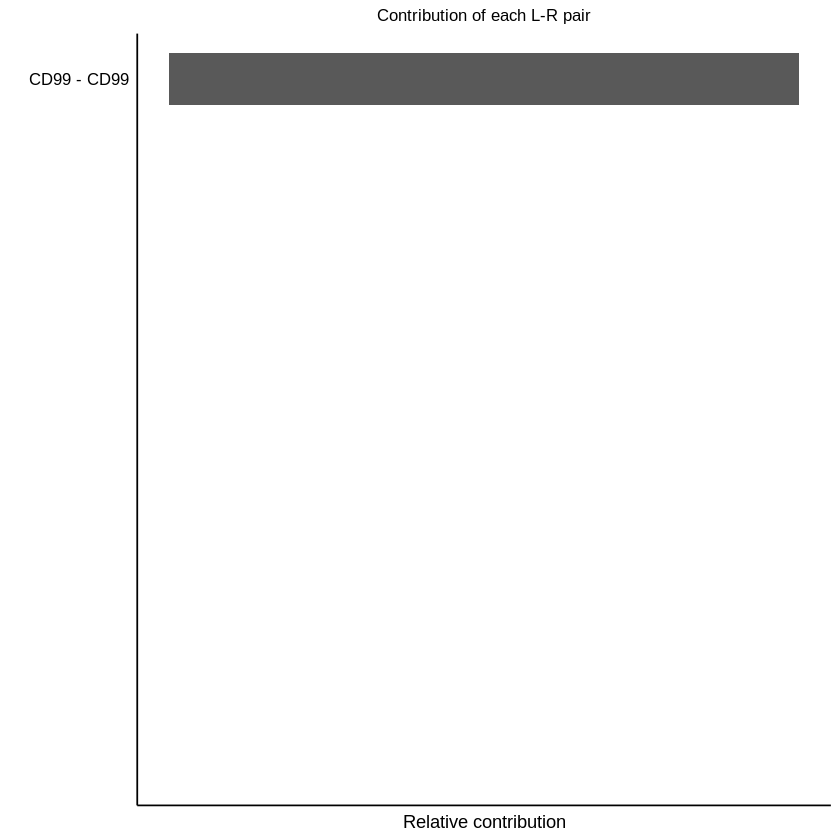

In [31]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

In [32]:
AL<-subset(ob.integrated,orig.ident=='MGUSPC2')

In [33]:
AL

An object of class Seurat 
22868 features across 1789 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [34]:
data.input  <- AL@assays$RNA@data
identity = data.frame(group =AL@meta.data$seurat_clusters   , row.names = row.names(AL@meta.data)) # create a dataframe consisting of the cell labels
unique(identity$group) # check the cell labels

[1] 1 0 3 2 4 5 6
Levels: 0 1 2 3 4 5 6

In [35]:
identity$group<-paste('cluster',identity$group,sep='')

In [36]:
cellchat <- createCellChat(data.input)
cellchat

Create a CellChat object from a data matrix



An object of class CellChat created from a single dataset 
 20868 genes.
 1789 cells.

In [37]:
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity

In [38]:
levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

In [39]:
CellChatDB <- CellChatDB.human 

In [40]:
colnames(CellChatDB$interaction)

[1] "interaction_name"   "pathway_name"       "ligand"            
 [4] "receptor"           "agonist"            "antagonist"        
 [7] "co_A_receptor"      "co_I_receptor"      "evidence"          
[10] "annotation"         "interaction_name_2"

In [41]:
cellchat@DB <- CellChatDB

In [42]:
cellchat <- subsetData(cellchat)

In [43]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [44]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [45]:
cellchat <- projectData(cellchat, PPI.human) 

In [46]:
cellchat <- computeCommunProb(cellchat)

In [47]:
cellchat <- computeCommunProbPathway(cellchat)

In [48]:
cellchat <- aggregateNet(cellchat)

In [49]:
cellchat@netP$pathways

[1] "MIF"    "MK"     "CADM"   "PECAM1"

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

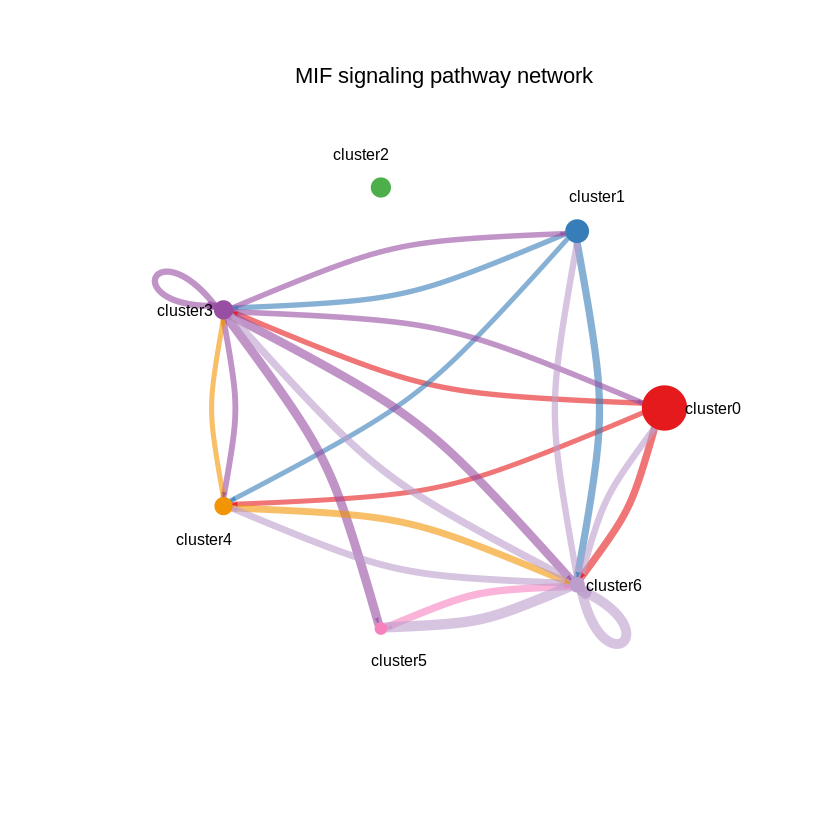

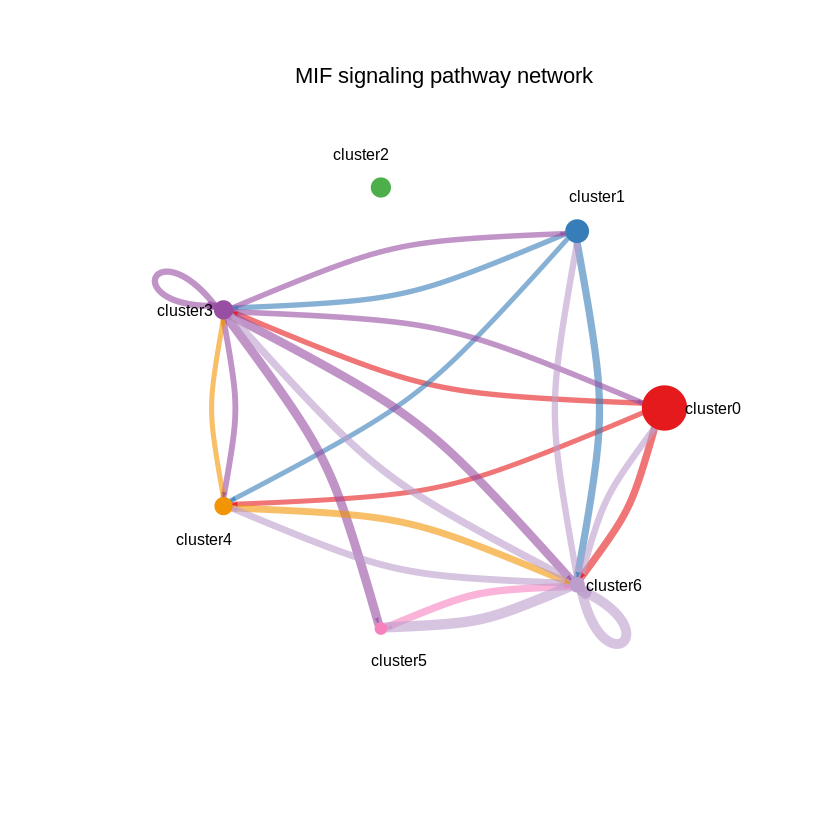

In [51]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MIF" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

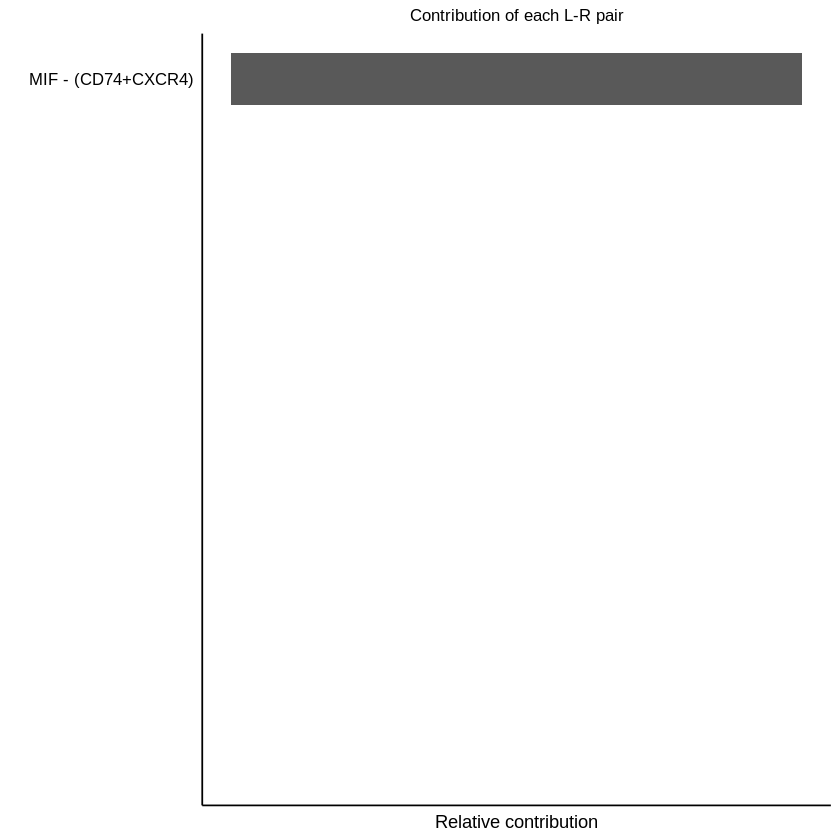

In [52]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

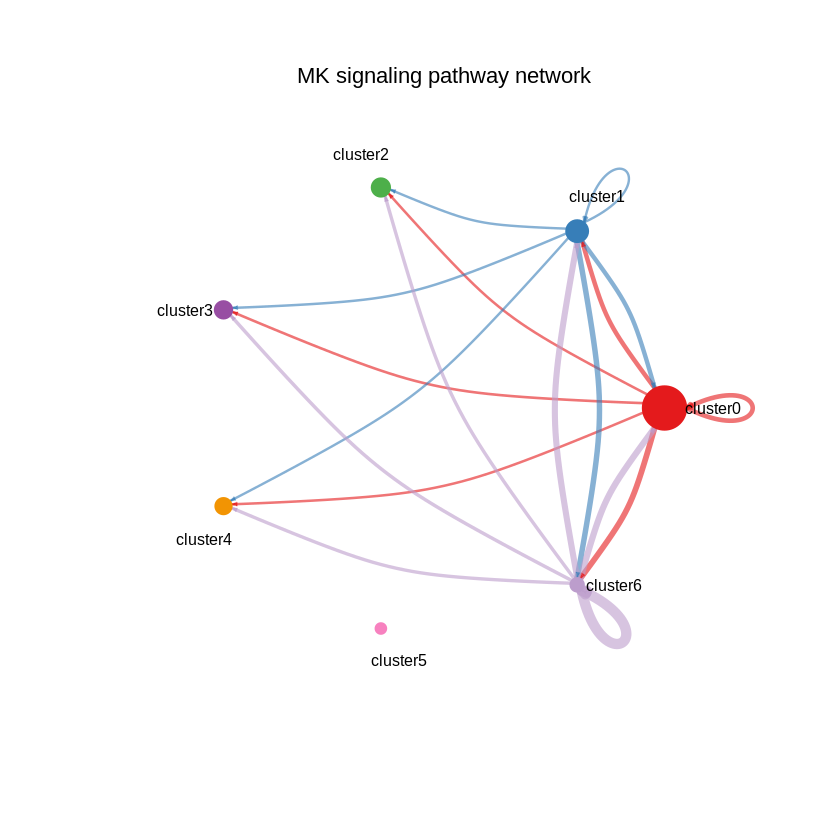

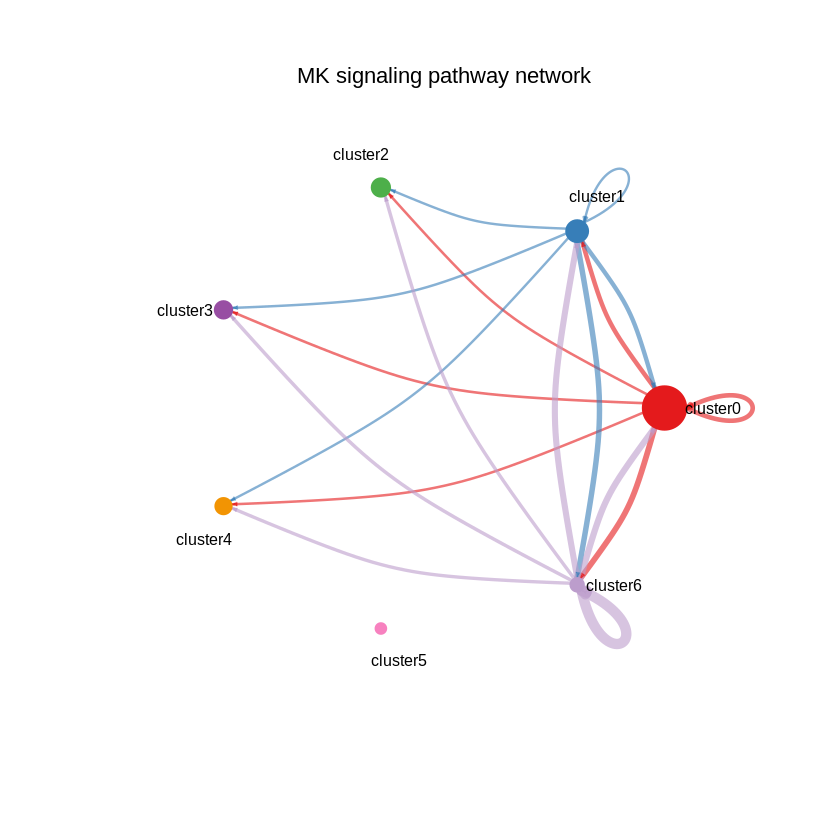

In [53]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "MK" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

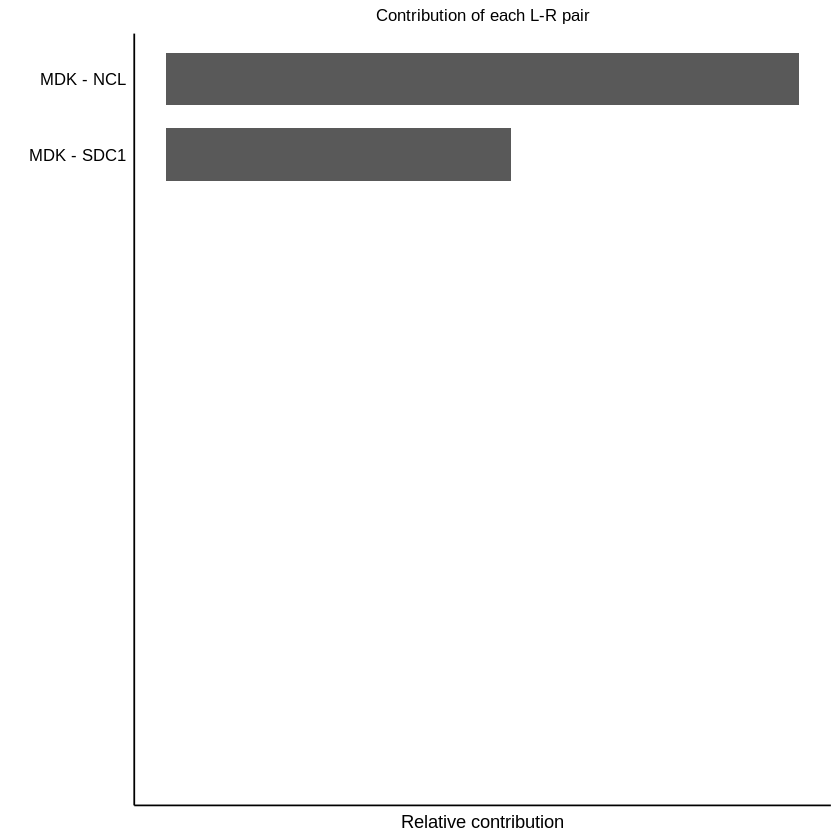

In [54]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

[1] "cluster0" "cluster1" "cluster2" "cluster3" "cluster4" "cluster5" "cluster6"

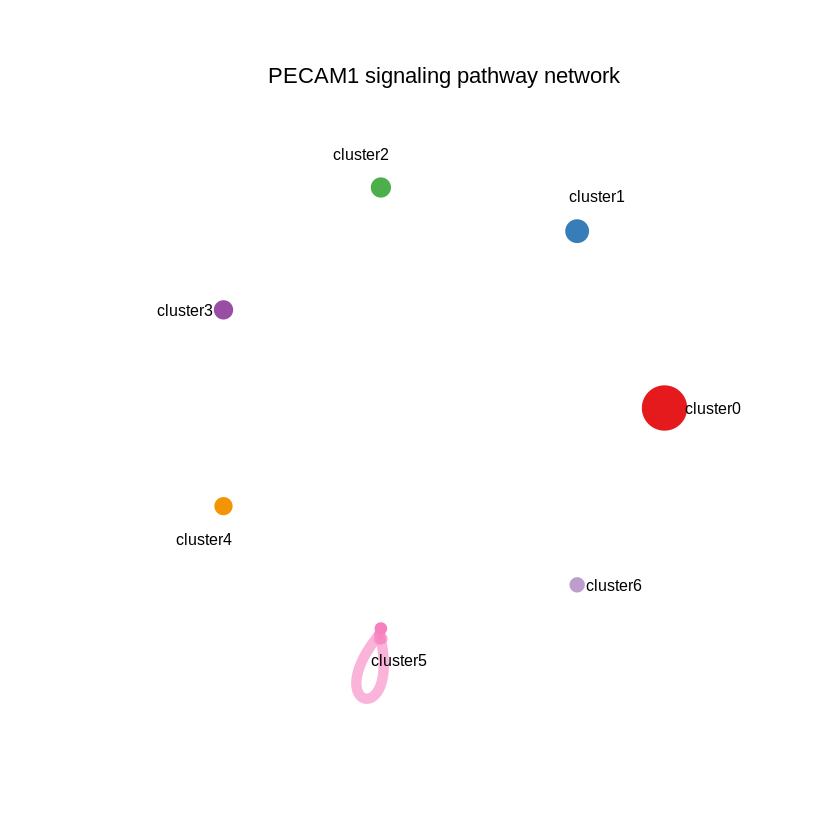

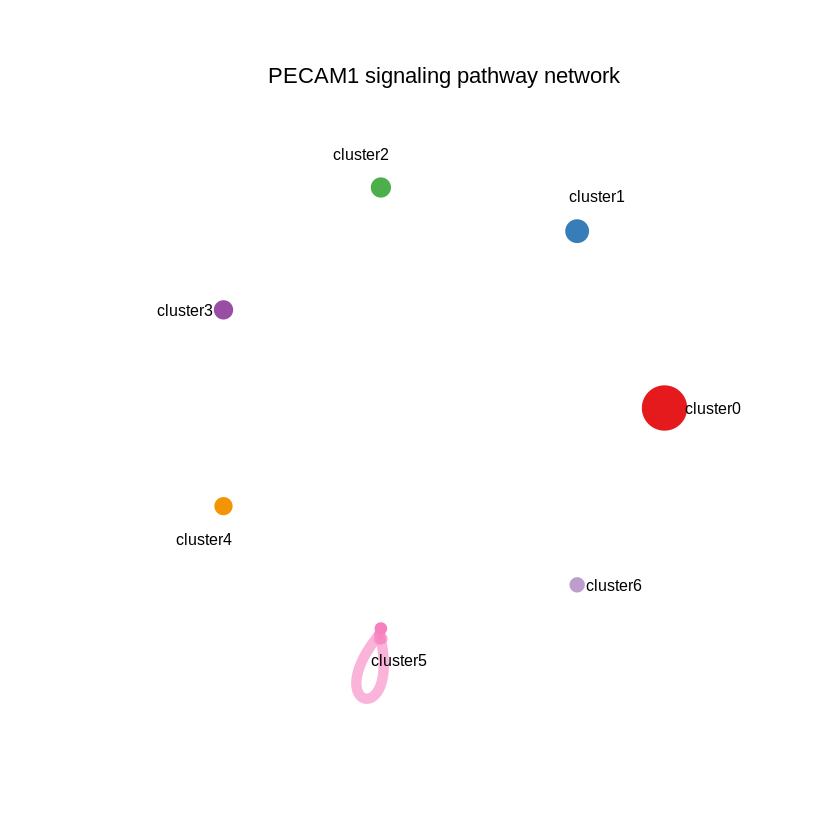

In [55]:
levels(cellchat@idents) 
vertex.receiver = seq(1,4) # a numeric vector
pathways.show <- "PECAM1" 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver, vertex.weight = groupSize)   

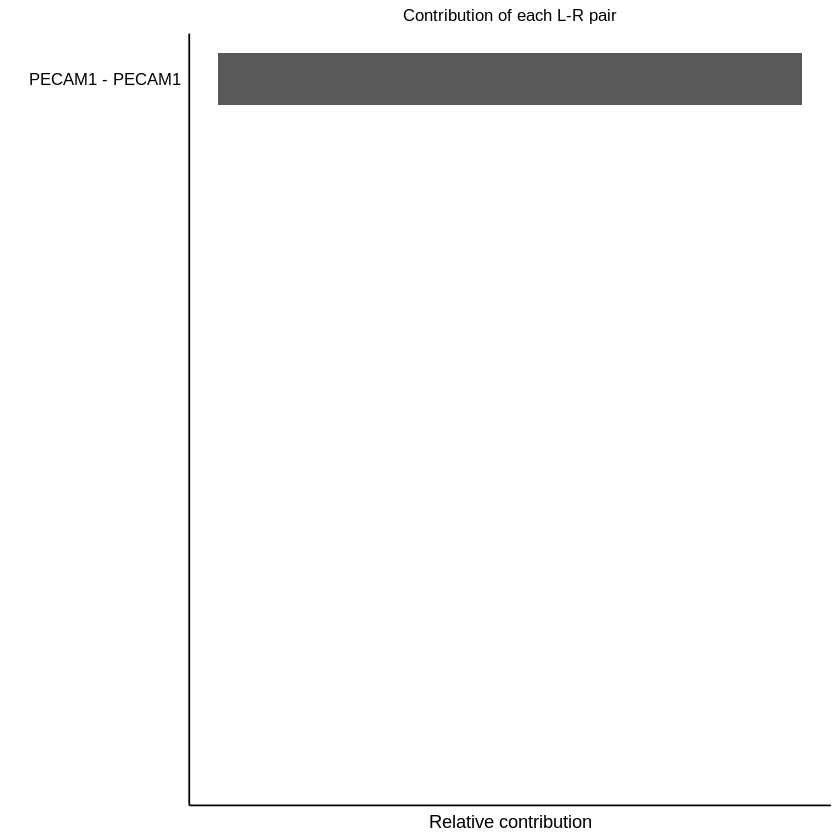

In [56]:
netAnalysis_contribution(cellchat, signaling = pathways.show)